# Improving Employee Retention By Predicting Employee Attrition Using Machine Learning

**Project Overview**:<br>
In this Mini Project, I have a role as a member of the Data Scientist team at a technology start-up company. The company is currently experiencing big problems; many employees have submitted their resignations, but the company has not yet decided on this matter. I will help the company to explain the current condition of its employees, as well as explore the problems within the company that cause employees to resign so that they can reduce the rate of employee resignations and outline a strategy that can increase employee retention. I will present descriptive findings from data using data visualization and data storytelling. I can get inferential findings using statistical analysis, or machine learning approaches with frameworks such as Interpretable & Explainable AI to convert model findings into a story.<br><br>

**Project Goals**:<br>
1. **Develop data-driven recommendations** to improve employee retention. This project aims to identify the root causes of employee resignations and develop data-driven recommendations to improve employee retention.
2. **Develop a predictive model** to predict employee resignations. And the output of the model will be explained so that it can be undesrtand easily by the company.<br>

**Project Objectives**:<br>
1. Analyze and understand the factors contributing to employee resignations through comprehensive data analysis and visualization, identifying key issues and trends affecting employee retention.
2. Develop and implement an interpretable predictive model to forecast future resignations, providing clear, data-driven recommendations to improve employee retention and support strategic decision-making.

**Project Business Metrics**:<br>
1. **Cost of Employee Attrition/Resignation**, Including the cost of hiring and training new employees, and cost for retaining employees.

This project workflow starts from Data Analysis, Data Preprocessing, untill Model Development and Evaluation.

In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
import plotly.express as px
import warnings
import plotly.graph_objects as go
import ppscore as pps
from sklearn.model_selection import train_test_split, StratifiedKFold, cross_val_score, GridSearchCV
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from imblearn.combine import SMOTETomek
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier
from xgboost import XGBClassifier
from imblearn.combine import SMOTETomek
import shap

from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix, roc_curve

warnings.filterwarnings('ignore')

In [2]:
data_ori = pd.read_csv('../data/hr_data.csv')
pd.set_option('display.max_columns', None)

## Task 1 - Data Preprocessing
**Task Goals**:<br>
Preparing raw data into clean data and ready to be processed for analysis.<br><br>
**Task Objectives**:<br>
1. Checking whole data information.
2. Checking missing values.
3. Checking duplicate values.
4. Checking Statistical summary of categorical and numerical features.

Data Perprocessing<br>
- Missing values checking
- Duplicate values checking
- Drop unnecessary columns
- Fix invalid values    

In [3]:
display(data_ori.info())

display(data_ori.head(3))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 287 entries, 0 to 286
Data columns (total 25 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   Username                            287 non-null    object 
 1   EnterpriseID                        287 non-null    int64  
 2   StatusPernikahan                    287 non-null    object 
 3   JenisKelamin                        287 non-null    object 
 4   StatusKepegawaian                   287 non-null    object 
 5   Pekerjaan                           287 non-null    object 
 6   JenjangKarir                        287 non-null    object 
 7   PerformancePegawai                  287 non-null    object 
 8   AsalDaerah                          287 non-null    object 
 9   HiringPlatform                      287 non-null    object 
 10  SkorSurveyEngagement                287 non-null    int64  
 11  SkorKepuasanPegawai                 282 non-n

None

,Username,EnterpriseID,StatusPernikahan,JenisKelamin,StatusKepegawaian,Pekerjaan,JenjangKarir,PerformancePegawai,AsalDaerah,HiringPlatform,SkorSurveyEngagement,SkorKepuasanPegawai,JumlahKeikutsertaanProjek,JumlahKeterlambatanSebulanTerakhir,JumlahKetidakhadiran,NomorHP,Email,TingkatPendidikan,PernahBekerja,IkutProgramLOP,AlasanResign,TanggalLahir,TanggalHiring,TanggalPenilaianKaryawan,TanggalResign
0,spiritedPorpoise3,111065,Belum_menikah,Pria,Outsource,Software Engineer (Back End),Freshgraduate_program,Sangat_bagus,Jakarta Timur,Employee_Referral,4,4.0,0.0,0.0,9.0,+6282232522xxx,spiritedPorpoise3135@yahoo.com,Magister,1,1.0,masih_bekerja,1972-07-01,2011-01-10,2016-2-15,-
1,jealousGelding2,106080,Belum_menikah,Pria,FullTime,Data Analyst,Freshgraduate_program,Sangat_kurang,Jakarta Utara,Website,4,4.0,4.0,0.0,3.0,+6281270745xxx,jealousGelding2239@yahoo.com,Sarjana,1,1.0,toxic_culture,1984-04-26,2014-01-06,2020-1-17,2018-6-16
2,pluckyMuesli3,106452,Menikah,Pria,FullTime,Software Engineer (Front End),Freshgraduate_program,Bagus,Jakarta Timur,Indeed,4,3.0,0.0,0.0,11.0,+6281346215xxx,pluckyMuesli3961@icloud.com,Magister,1,1.0,jam_kerja,1974-01-07,2011-01-10,2016-01-10,2014-9-24


Information obtained about the data:
- Data size is 287 rows and 25 columns
- There are missing values in the data
- There are numerical, categorical, and (supposed to be) datetime columns
- There are no target columns, will create one from `TanggalResign` column because the date when the employee resigns are the indicator of the employee have resigned.   

Checking and Handling Missing Values

In [4]:
null_val = data_ori.isnull().sum()
null_val = round(null_val[null_val > 0] / data_ori.shape[0] * 100, 2)
print(f'Proportion of missing values in the dataset:\n\n{null_val}')

Proportion of missing values in the dataset:

SkorKepuasanPegawai                    1.74
JumlahKeikutsertaanProjek              1.05
JumlahKeterlambatanSebulanTerakhir     0.35
JumlahKetidakhadiran                   2.09
IkutProgramLOP                        89.90
AlasanResign                          23.00
dtype: float64


Dive into missing values in `AlasanResign` column

In [5]:
resign_nan = data_ori[data_ori['AlasanResign'].isna()]
resign_nan[['AlasanResign', 'TanggalResign']]

,AlasanResign,TanggalResign
105,NaN,-
187,NaN,-
189,NaN,-
190,NaN,-
195,NaN,-
...,...,...
279,NaN,-
280,NaN,-
281,NaN,-
282,NaN,-


Findings:
- `IkutProgramLOP` has too many missing values (more than 85% from total data), I decided to drop this column because it has too many missing information.
- As we can see when the AlasanResign is missing, the `TanggalResign` value is '-', this means that the employee has not resigned yet. So, it will be more appropriate to fill the missing values in `AlasanResign` with 'masih_bekerja' value.
- Because most of the daata is Categorical, rest of the columns with missing values will be imputed with modus.

In [6]:
# Create a copy of the original data to avoid modifying the original data
# Copy data for EDAs
data_eda = data_ori.copy()

# Define function to clean missing values
def clean_missing(data):
    """
    Function to clean missing values in the dataset.
    Args:
    data (DataFrame): dataset to be cleaned.
    Returns:
    data (DataFrame): cleaned dataset.
    
    Example:
    >>> data = clean_missing(data)
    """
    # Drop IkutProgramLOP columns
    data = data.drop(columns='IkutProgramLOP')

    cat_missing = ['AlasanResign', 'SkorKepuasanPegawai']
    
    for catcol in cat_missing:
        data[catcol] = data[catcol].fillna(data[catcol].mode()[0])
    
    # Define column that still contain missing values
    num_missing = ['JumlahKeikutsertaanProjek',
                   'JumlahKeterlambatanSebulanTerakhir',
                   'JumlahKetidakhadiran']
    
    # fill rest of the missing values with median
    for numcol in num_missing:
        data[numcol] = data[numcol].fillna(data[numcol].median())

    return data

data_eda = clean_missing(data_eda)

# Check if there are any missing values left
null_val2 = data_eda.isnull().sum().sum()
print(f'Missing values left: {null_val2}')

Missing values left: 0


Checking Duplicate Values

In [7]:
total_dupl = data_eda.duplicated().sum()
print(f'Total number of duplicated rows in the data: {total_dupl}')

Total number of duplicated rows in the data: 0


In [8]:
# data_ori['EnterpriseID'] = data_ori['EnterpriseID'].astype('object')
categorical = data_eda.select_dtypes('object')

print('Statistical summary for Categorical data:')
display(categorical.describe())

Statistical summary for Categorical data:


,Username,StatusPernikahan,JenisKelamin,StatusKepegawaian,Pekerjaan,JenjangKarir,PerformancePegawai,AsalDaerah,HiringPlatform,NomorHP,Email,TingkatPendidikan,PernahBekerja,AlasanResign,TanggalLahir,TanggalHiring,TanggalPenilaianKaryawan,TanggalResign
count,287,287,287,287,287,287,287,287,287,287,287,287,287,287,287,287,287,287
unique,285,5,2,3,14,3,5,5,9,287,287,3,2,11,284,97,127,53
top,boredEggs0,Belum_menikah,Wanita,FullTime,Software Engineer (Back End),Freshgraduate_program,Biasa,Jakarta Pusat,Indeed,+6282232522xxx,spiritedPorpoise3135@yahoo.com,Sarjana,1,masih_bekerja,1987-06-14,2011-01-10,2020-1-14,-
freq,2,132,167,217,109,169,85,72,85,1,1,176,286,198,2,12,17,198


From statistical summary of the categorical data above we can see that:
- There's no column with only 1 unique value.
- There's 2 columns with pretty much unique values, `Pekerjaan` and `HiringPlatform`.(Other than identifier columns)
- There are 4 people with the same username, lets take colser look on the data again.

In [9]:
data_eda[data_eda.Username.duplicated()]

,Username,EnterpriseID,StatusPernikahan,JenisKelamin,StatusKepegawaian,Pekerjaan,JenjangKarir,PerformancePegawai,AsalDaerah,HiringPlatform,SkorSurveyEngagement,SkorKepuasanPegawai,JumlahKeikutsertaanProjek,JumlahKeterlambatanSebulanTerakhir,JumlahKetidakhadiran,NomorHP,Email,TingkatPendidikan,PernahBekerja,AlasanResign,TanggalLahir,TanggalHiring,TanggalPenilaianKaryawan,TanggalResign
120,brainyMagpie7,101264,Bercerai,Pria,FullTime,Product Design (UI & UX),Freshgraduate_program,Kurang,Jakarta Barat,Indeed,4,3.0,6.0,0.0,17.0,+6285946196xxx,brainyMagpie7608@proton.com,Magister,1,masih_bekerja,1970-04-25,2017-02-10,2020-2-25,-
204,boredEggs0,106285,Lainnya,Wanita,FullTime,Software Engineer (Front End),Freshgraduate_program,Bagus,Jakarta Timur,Diversity_Job_Fair,3,3.0,0.0,0.0,12.0,+6285733263xxx,boredEggs0225@outlook.com,Sarjana,1,jam_kerja,1967-06-03,2013-04-01,2020-2-13,2014-8-19


In [10]:
display(data_eda[data_eda.Username=='boredEggs0'])
display(data_eda[data_eda.Username=='brainyMagpie7'])

,Username,EnterpriseID,StatusPernikahan,JenisKelamin,StatusKepegawaian,Pekerjaan,JenjangKarir,PerformancePegawai,AsalDaerah,HiringPlatform,SkorSurveyEngagement,SkorKepuasanPegawai,JumlahKeikutsertaanProjek,JumlahKeterlambatanSebulanTerakhir,JumlahKetidakhadiran,NomorHP,Email,TingkatPendidikan,PernahBekerja,AlasanResign,TanggalLahir,TanggalHiring,TanggalPenilaianKaryawan,TanggalResign
158,boredEggs0,100326,Bercerai,Wanita,FullTime,Product Manager,Freshgraduate_program,Bagus,Jakarta Timur,Diversity_Job_Fair,3,4.0,0.0,0.0,12.0,+6283854646xxx,boredEggs0834@outlook.com,Sarjana,1,ganti_karir,1974-01-12,2011-01-10,2017-1-30,2016-3-31
204,boredEggs0,106285,Lainnya,Wanita,FullTime,Software Engineer (Front End),Freshgraduate_program,Bagus,Jakarta Timur,Diversity_Job_Fair,3,3.0,0.0,0.0,12.0,+6285733263xxx,boredEggs0225@outlook.com,Sarjana,1,jam_kerja,1967-06-03,2013-04-01,2020-2-13,2014-8-19


,Username,EnterpriseID,StatusPernikahan,JenisKelamin,StatusKepegawaian,Pekerjaan,JenjangKarir,PerformancePegawai,AsalDaerah,HiringPlatform,SkorSurveyEngagement,SkorKepuasanPegawai,JumlahKeikutsertaanProjek,JumlahKeterlambatanSebulanTerakhir,JumlahKetidakhadiran,NomorHP,Email,TingkatPendidikan,PernahBekerja,AlasanResign,TanggalLahir,TanggalHiring,TanggalPenilaianKaryawan,TanggalResign
80,brainyMagpie7,106620,Belum_menikah,Pria,FullTime,Software Engineer (Back End),Senior_level,Biasa,Jakarta Pusat,Indeed,2,5.0,5.0,0.0,9.0,+6281267984xxx,brainyMagpie7048@gmail.com,Doktor,1,internal_conflict,1986-09-01,2014-9-29,2020-1-18,2019-06-06
120,brainyMagpie7,101264,Bercerai,Pria,FullTime,Product Design (UI & UX),Freshgraduate_program,Kurang,Jakarta Barat,Indeed,4,3.0,6.0,0.0,17.0,+6285946196xxx,brainyMagpie7608@proton.com,Magister,1,masih_bekerja,1970-04-25,2017-02-10,2020-2-25,-


They have different privacy data(different birth, telephone, email, etc). so I decided to keep all of them because they are not considered as a duplicate data.

In [11]:
numerical = data_eda.select_dtypes('number')
print('Statistical summary for Numerical data:\n')
display(numerical.describe())

Statistical summary for Numerical data:



,EnterpriseID,SkorSurveyEngagement,SkorKepuasanPegawai,JumlahKeikutsertaanProjek,JumlahKeterlambatanSebulanTerakhir,JumlahKetidakhadiran
count,287.000000,287.000000,287.000000,287.000000,287.000000,287.000000
mean,105923.324042,3.101045,3.888502,1.167247,0.411150,10.439024
std,4044.977599,0.836388,0.913060,2.285537,1.273018,6.829769
min,100282.000000,1.000000,1.000000,0.000000,0.000000,1.000000
25%,101269.000000,3.000000,3.000000,0.000000,0.000000,5.000000
50%,106069.000000,3.000000,4.000000,0.000000,0.000000,10.000000
75%,110514.500000,4.000000,5.000000,0.000000,0.000000,15.000000
max,111703.000000,5.000000,5.000000,8.000000,6.000000,55.000000


All of the columns are considered as categorical data, which means if we see the data statistical summary we can't say that the data is normally distributed or skewed, because the data is categorical data.

## Feature Engineering

Checking values each columns to make sure the value is valid

In [12]:
for col in data_eda.columns:
    print(f'Value counts for {data_eda[col].value_counts()}\n')

Value counts for boredEggs0           2
brainyMagpie7        2
spiritedPorpoise3    1
grudgingMeerkat3     1
boastfulSyrup4       1
                    ..
lazyPorpoise0        1
brainyFish3          1
sincereSeafowl4      1
jumpyTomatoe4        1
puzzledFish5         1
Name: Username, Length: 285, dtype: int64

Value counts for 111065    1
106008    1
100869    1
101560    1
100874    1
         ..
105429    1
106638    1
100919    1
101306    1
106214    1
Name: EnterpriseID, Length: 287, dtype: int64

Value counts for Belum_menikah    132
Menikah           57
Lainnya           48
Bercerai          47
-                  3
Name: StatusPernikahan, dtype: int64

Value counts for Wanita    167
Pria      120
Name: JenisKelamin, dtype: int64

Value counts for FullTime      217
Outsource      66
Internship      4
Name: StatusKepegawaian, dtype: int64

Value counts for Software Engineer (Back End)      109
Software Engineer (Front End)      72
Software Engineer (Android)        24
Product Des

In [13]:
invalid_reason = data_eda[data_eda.AlasanResign=='Product Design (UI & UX)']
invalid_reason['Pekerjaan']

27     Software Engineer (Front End)
124         Product Design (UI & UX)
147    Software Engineer (Front End)
203     Software Engineer (Back End)
Name: Pekerjaan, dtype: object

From the value counts of each columns there are some invalid values/values that need to be adjusted in the data:
- `StatusPernikahan` has '-' value, I will replace it with 'Unknown'.
- `PernahBekerja` has '1' value with 286 counts, but our data only has 287 rows, I will drop this column because it has no information.
- For `AlasanResign` with invalid values `Product Design (UI & UX)`, this value is a job title and because of that it will be replaced with 'Unknown' instead.

In [14]:
# Create function to feature engineer the data for feat eng the train and test data later
def feat_eng(data):
    """
    This function will feature engineer the data from cleaning the data(replacing values) to creating new columns

    Parameters:
    data: DataFrame, the data to be feature engineered

    Returns:
    data: DataFrame, the feature engineered data

    Example:
    >>> data_processed = feat_eng(data_ori)
    """
    # Replace '-' value in StatusPernikahan with 'Unknown'
    data['StatusPernikahan'] = data['StatusPernikahan'].replace('-', 'Lainnya')

    # Replace 'Product Design (UI & UX)' in AlasanResign with 'Product Design'
    data['AlasanResign'] = data['AlasanResign'].replace('Product Design (UI & UX)', 'Unknown')

    # Create new 'Age' column from 'TanggalLahir'
    # Convert 'TanggalLahir to datetime format
    data['TanggalLahir'] = pd.to_datetime(data['TanggalLahir'])

    # Calculate age from 'TanggalLahir'
    data['Age'] = 2020 - data['TanggalLahir'].dt.year

    # Group Age column to create a new column 'AgeGroup'
    bin_age = [
        (data['Age'] >= 30) & (data['Age'] < 40),
        (data['Age'] >= 40) & (data['Age'] < 50),
        (data['Age'] >= 50) & (data['Age'] < 60),
        (data['Age'] >= 60)
    ] 
    age_label = ['Thirty', 'Forty', 'Fifty', 'Sixty and Above']
    data['AgeGroup'] = np.select(bin_age, age_label)

    # Convert 'TanggalHiring' to datetime format
    data['TanggalHiring'] = pd.to_datetime(data['TanggalHiring'])

    # Create new column 'HiringYear' from 'TanggalHiring'
    data['HiringYear'] = data['TanggalHiring'].dt.year

    # Create target column 'Resign' from 'TanggalResign'
    data['Resign'] = data['TanggalResign'].apply(lambda x: 'No' if x == '-' else 'Yes')

    # Replace '-' value in 'TanggalResign' with nan
    data['TanggalResign'] = data['TanggalResign'].replace('-', np.nan)

    # Convert 'TanggalResign' to datetime format
    data['TanggalResign'] = pd.to_datetime(data['TanggalResign'])

    # Create new column 'ResignYear' from 'TanggalResign'
    data['ResignYear'] = data['TanggalResign'].dt.year

    # Convert 'TanggalPenilaianKaryawan' to datetime format 
    data['TanggalPenilaianKaryawan'] = pd.to_datetime(data['TanggalPenilaianKaryawan'])

    # Create new column 'YearEval' from 'TanggalPenilaianKaryawan'
    data['YearEval'] = data['TanggalPenilaianKaryawan'].dt.year

    # Calculate 'HiringToEval' (in year) how long is it from hiring to evaluation
    data['HiringToEval'] = data['YearEval'] - data['HiringYear']

    return data

# Drop 'PernahBekerja' and other unnecessary columns(identifiers)
# data_proc1 = data_proc.drop(columns=['PernahBekerja', 'Username', 'EnterpriseID', 'NomorHP', 'Email', 'TanggalLahir', 'TanggalHiring'])

In [15]:
# Apply feature engineering function to the data
data_eda1 = feat_eng(data_eda)

# Display the data after feature engineering
display(data_eda1.head(3))

,Username,EnterpriseID,StatusPernikahan,JenisKelamin,StatusKepegawaian,Pekerjaan,JenjangKarir,PerformancePegawai,AsalDaerah,HiringPlatform,SkorSurveyEngagement,SkorKepuasanPegawai,JumlahKeikutsertaanProjek,JumlahKeterlambatanSebulanTerakhir,JumlahKetidakhadiran,NomorHP,Email,TingkatPendidikan,PernahBekerja,AlasanResign,TanggalLahir,TanggalHiring,TanggalPenilaianKaryawan,TanggalResign,Age,AgeGroup,HiringYear,Resign,ResignYear,YearEval,HiringToEval
0,spiritedPorpoise3,111065,Belum_menikah,Pria,Outsource,Software Engineer (Back End),Freshgraduate_program,Sangat_bagus,Jakarta Timur,Employee_Referral,4,4.0,0.0,0.0,9.0,+6282232522xxx,spiritedPorpoise3135@yahoo.com,Magister,1,masih_bekerja,1972-07-01,2011-01-10,2016-02-15,NaT,48,Forty,2011,No,NaN,2016,5
1,jealousGelding2,106080,Belum_menikah,Pria,FullTime,Data Analyst,Freshgraduate_program,Sangat_kurang,Jakarta Utara,Website,4,4.0,4.0,0.0,3.0,+6281270745xxx,jealousGelding2239@yahoo.com,Sarjana,1,toxic_culture,1984-04-26,2014-01-06,2020-01-17,2018-06-16,36,Thirty,2014,Yes,2018.0,2020,6
2,pluckyMuesli3,106452,Menikah,Pria,FullTime,Software Engineer (Front End),Freshgraduate_program,Bagus,Jakarta Timur,Indeed,4,3.0,0.0,0.0,11.0,+6281346215xxx,pluckyMuesli3961@icloud.com,Magister,1,jam_kerja,1974-01-07,2011-01-10,2016-01-10,2014-09-24,46,Forty,2011,Yes,2014.0,2016,5


## Task 2 - Annual Report on Employee Number Changes
**Task Goals**:<br>
Creating an annual report on the number of employees in the company.<br><br>
**Task Objectives**:<br>
1. Create 2 aggregated tables for the number of employees hired and resigned each year.
2. Join the 2 tables into 1 table.
3. Impute the missing values on the missing years.
4. Count total the employee who resigned and still working each year.
5. Make a visualization of the annual report.
6. Interpret the annual report.

In [16]:
# Create aggregated tables for number of employees hired and resigned each year
resign_agg = data_eda1.groupby('ResignYear')['EnterpriseID'].count().reset_index(name='TotalResign')
hire_agg =  data_eda1.groupby('HiringYear')['EnterpriseID'].count().reset_index(name='TotalHires')

# Kpom the 2 aggregated tables with outer join because there's missing year in the data
metrics_agg = pd.merge(resign_agg, hire_agg, left_on='ResignYear', right_on='HiringYear', how='outer')

# Impute missing values in the aggregated table
# Define columns to fill missing values
cols_fillna = {
    'ResignYear': 'HiringYear',
    'TotalResign': 0,
    'HiringYear': 'ResignYear',
    'TotalHires': 0
}

# Fill/Impute missing values
for col, fill_value in cols_fillna.items():
    if isinstance(fill_value, str):
        metrics_agg[col] = metrics_agg[col].fillna(metrics_agg[fill_value])
    else:
        metrics_agg[col] = metrics_agg[col].fillna(fill_value)

# Set only 1 year column for the year
# Rename Resign Year as the year
rename_yr = {'ResignYear': 'Year'}
metrics_agg = metrics_agg.rename(columns=rename_yr)
metrics_agg.drop(columns='HiringYear', inplace=True)

# Change the Year dtype to int for better view
metrics_agg['Year'] = metrics_agg['Year'].astype(int)

# Create a new column by Calculate the difference between TotalHiring and TotalResign for each year
metrics_agg['NetHires'] = metrics_agg['TotalHires'] - metrics_agg['TotalResign']

metrics_agg.sort_values(by='Year', inplace=True)


# Create new column by calculate the cumulative sum of TotalHiring over the years0
metrics_agg['CumulativeHiring'] = metrics_agg['NetHires'].cumsum()

# Create a new column by calculate the cumulative sum of TotalResign over the years
metrics_agg['CumulativeResign'] = metrics_agg['TotalResign'].cumsum()

# Create a new column by calculate the remaining employees for each year
# by subtracting the cumulative resignations from the cumulative hirings
metrics_agg['RemainEmp'] = metrics_agg['CumulativeHiring'] - metrics_agg['CumulativeResign']


metrics_agg

,Year,TotalResign,TotalHires,NetHires,CumulativeHiring,CumulativeResign,RemainEmp
8,2006,0.0,1.0,1.0,1.0,0.0,1.0
9,2007,0.0,2.0,2.0,3.0,0.0,3.0
10,2008,0.0,2.0,2.0,5.0,0.0,5.0
11,2009,0.0,7.0,7.0,12.0,0.0,12.0
12,2010,0.0,8.0,8.0,20.0,0.0,20.0
13,2011,0.0,76.0,76.0,96.0,0.0,96.0
14,2012,0.0,41.0,41.0,137.0,0.0,137.0
0,2013,5.0,43.0,38.0,175.0,5.0,170.0
1,2014,12.0,56.0,44.0,219.0,17.0,202.0
2,2015,8.0,31.0,23.0,242.0,25.0,217.0


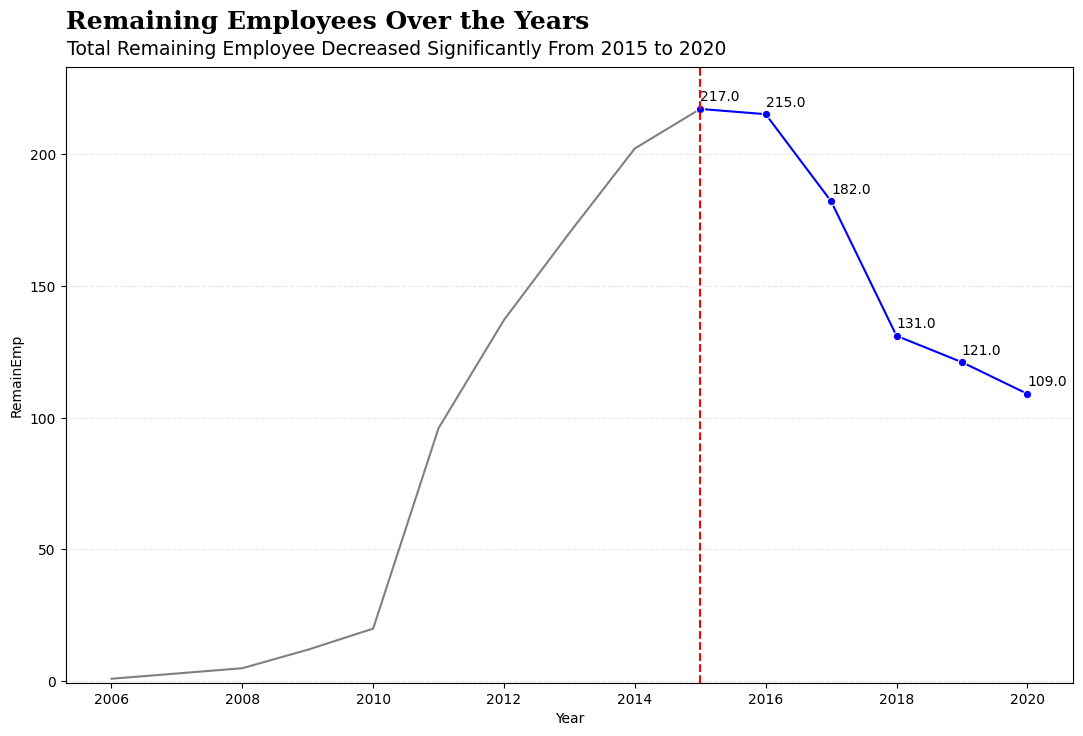

In [17]:
yearsh = list(range(2015, 2021))
dat2015 = metrics_agg[metrics_agg.Year.isin(yearsh)]

yearsnh = list(range(2006, 2016))
dat2006 = metrics_agg[metrics_agg.Year.isin(yearsnh)]

plt.figure(figsize=(13, 8))
sns.lineplot(
    x='Year',
    y='RemainEmp',
    data=dat2006,
    # marker='o',
    color='grey'
)

line = sns.lineplot(
    x='Year',
    y='RemainEmp',
    data=dat2015,
    marker='o',
    color='b'
)

for x, y in zip(dat2015['Year'], dat2015['RemainEmp']):
    plt.text(x=x, y=y+3, s=f'{y}', color='black')


fdbold = {
    'family': 'serif',
    'color': 'black',
    'weight': 'bold',
    'size': 18
}

plt.title(
    'Remaining Employees Over the Years',
    fontdict=fdbold, 
    loc='Left',
    pad=27.5
)

plt.text(
    2005.32,
    237.5,
    'Total Remaining Employee Decreased Significantly From 2015 to 2020',
    fontsize=13.5,
    color='black'
)

# plt.text(2013.3, 235, 'From 2015 to 2020', fontsize=13.5, color='black')
plt.axvline(2015, color='r', linestyle='--', linewidth=1.5)
plt.ylim(-0.5, 233)
plt.grid(axis='y', linestyle='--', alpha=0.3)

plt.show()

Insights:<br>
- The number of employees increase significantly from 2010 to 2015, but then decrease significantly from 2016 to 2020.

- From 2016 to 2020, The **company has lost 108 employees** in total, with the highest number of employees lost in 2018.

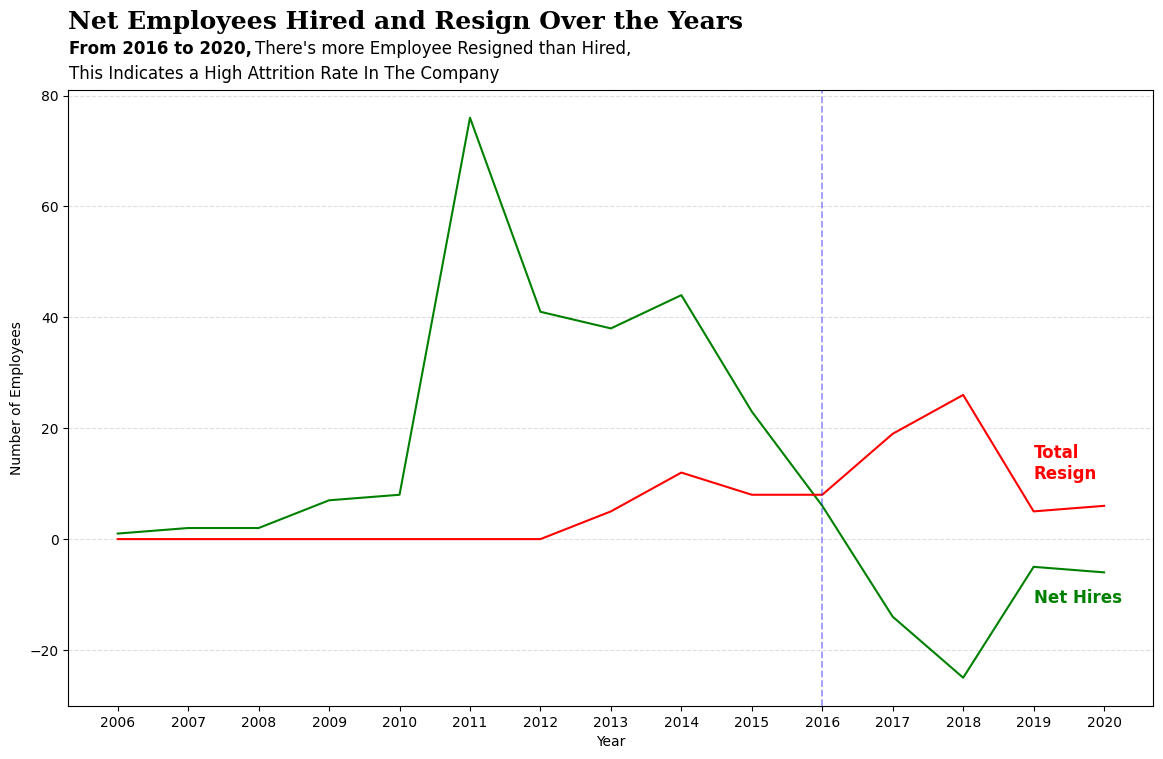

In [18]:
plt.figure(figsize=(14, 8))

sns.lineplot(
    x='Year', 
    y='NetHires',
    data=metrics_agg,
    # marker='o',
    color='g'
)
sns.lineplot(
    x='Year', 
    y='TotalResign', 
    data=metrics_agg,
    # marker='o', 
    color='r'
)

# for i in range(len(metrics_agg)):
#     if metrics_agg['Year'].iloc[i] >= 2017:
#         plt.annotate(
#             metrics_agg['NetHires'].iloc[i],
#             (metrics_agg['Year'].iloc[i], metrics_agg['NetHires'].iloc[i]),
#             textcoords='offset points',
#             xytext=(0, 5),
#             ha='left'
#         )
#         plt.annotate(
#             metrics_agg['TotalResign'].iloc[i],
#             (metrics_agg['Year'].iloc[i], metrics_agg['TotalResign'].iloc[i]),
#             textcoords='offset points',
#             xytext=(0, 1),
#             ha='right'
#         )

plt.xticks(metrics_agg['Year'])
# plt.yticks(np.arange(-20, 80, 10))
plt.ylabel('Number of Employees')
fdbold = {'family': 'serif', 'color': 'black', 'weight': 'bold', 'size': 18}
plt.title('Net Employees Hired and Resign Over the Years', fontdict=fdbold, pad=44, loc='left')
plt.text(2005.31, 87.5, "From 2016 to 2020,", fontsize=12, weight='bold', color='black')
plt.text(2007.95, 87.5, "There's more Employee Resigned than Hired,", fontsize=12, color='black')
plt.text(2005.31, 83, "This Indicates a High Attrition Rate In The Company", fontsize=12, color='black')

plt.text(2019, -11.4, 'Net Hires', color='g', fontsize=12, weight='bold')
plt.text(2019, 11, 'Total\nResign', color='r', fontsize=12, weight='bold')
plt.axvline(2016, color='b', linewidth=1.3, alpha=0.4, linestyle='--')

plt.grid(axis='y', linestyle='--', alpha=0.4)

plt.show()

**Insight**:<br>
As have said before, the company employee number is increasing every year(total resign still under net hires) from 2006 to 2015, untill 2016 to 2020 the total resign is more than the total hires. This indicates that the company has a problem with employee retention(High Reisgnation Rate).

Text(0.5, 1.0, 'Percentage of Employee Resign from 2006 to 2020')

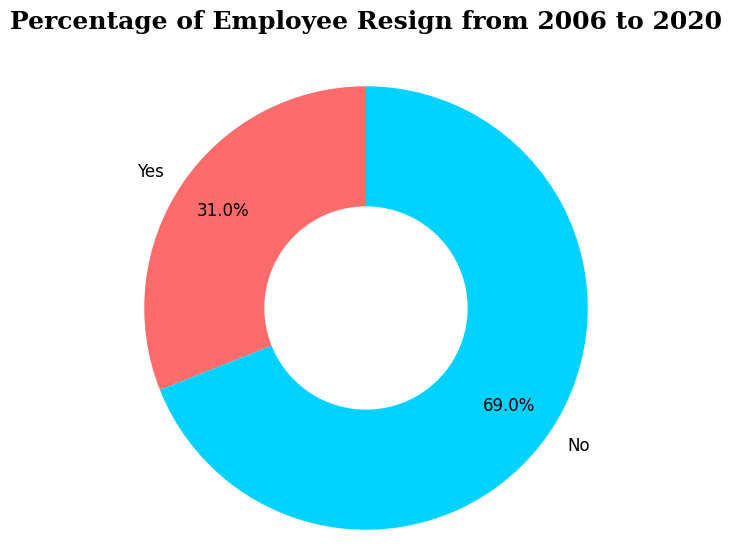

In [19]:
# Set the figure size
plt.figure(figsize=(15, 6))

# Get the value counts of total employee resign from 'Resign' column
resign_count = data_eda1['Resign'].value_counts()

# Get the index of the value counts 
resign_index = resign_count.index


# Create a pie chart for the total employee resign to see the percentage of employee resign
wedges, texts, autotexts = plt.pie(
    resign_count,
    labels=resign_index,
    autopct='%1.1f%%',
    startangle=90,
    colors=['#00D2FF', '#FD6B6B'],
    textprops={'fontsize': 12},
    wedgeprops=dict(width=0.65),
    pctdistance=0.78,
    radius=1.2,
    counterclock=False
)

plt.title('Percentage of Employee Resign from 2006 to 2020', fontdict=fdbold, pad=35)

**Insight**:<br>
The total Attrition Rate from 2006 to 2020 is 31.0% (Mild Imbalanced), while the retention rate is 69.0%,
This is a high attrition rate, which means the company has a problem as I said before.
Because of this the company needs to take action to reduce the attrition rate and increase the retention rate, That's why I will create a predictive model to predict employee attrition.

## Task 3 -  Resign Reason Analysis For Employee Attrition Management Strategy
**Task Goals**:<br>
 Visualize data, Give insight to stakeholder, so the stakeholder understand what is the main problem that cause the employee resign, and can take strategy action to reduce employee resignations.<br><br>

**Task Objectives**:<br>
1. Create aggregated tables resign or not resign by their job title.
2. Join 2 aggregated tables (Resign and Not Resign) into 1 table.
3. Create 2 new columns from the joined table total employee, and percentage of remaining employees.
4. Create a plot to visualize the percentage of remaining employees by job title.
5. Create aggregated tables to count total resign employee by career level, employee performance, and resign reason.
6. Create a plot to visualize the aggregated table.
7. Write an interpretation and recommendation for the plot.


In [20]:
# Group the data by 'Pekerjaan' and 'Resign' columns, then count the values and reset the index
job_byres = data_eda1.groupby('Pekerjaan')['Resign'].value_counts().reset_index(name='TotalResign')

# Filter the rows where 'Resign' is 'Yes' and drop the 'Resign' column
resign = job_byres[job_byres['Resign']=='Yes'].drop(columns='Resign')

# Filter the rows where 'Resign' is 'No' and drop the 'Resign' columns
not_resign = job_byres[job_byres['Resign']=='No'].drop(columns='Resign')

# Rename the 'TotalResign' column to 'TotalRemaining' in the not_resign dataframe
not_resign = not_resign.rename(columns={'TotalResign': 'TotalRemaining'})

# Merge the 'resign' and 'not_resign' dataframes on 'Pekerjaan' column
joinedres = pd.merge(resign, not_resign, on='Pekerjaan', how='outer')

# Fill any Nan values with 0 because the NaN values are the result of the outer join
joinedres.fillna(0, inplace=True)

# Convert the 'TotalResign' and 'TotalRemaining' columns to integer
joinedres['TotalResign'] = joinedres['TotalResign'].astype(int)

# Calculate the total number of employees by subtracting 'TotalResign' from 'TotalRemaining'
joinedres['TotalEmployee'] = joinedres['TotalRemaining'] - joinedres['TotalResign']

# Calculate the percentage of remaining employees
joinedres['PercentageRemaining'] = round((joinedres['TotalEmployee'] / joinedres['TotalRemaining']) * 100, 2)

# Calculate the percentage of employees that resigned
joinedres['PercentageResign'] = round((joinedres['TotalResign'] / joinedres['TotalRemaining']) * 100, 2)

# add new column 'FullPct' with 100 value for plotting purpose
joinedres['FullPct'] = 100

# Sort the joinedres dataframe by 'PercentageResign' column
joinedres = joinedres.sort_values(by='PercentageResign')

# Display the joinedres dataframe
display(joinedres)

,Pekerjaan,TotalResign,TotalRemaining,TotalEmployee,PercentageRemaining,PercentageResign,FullPct
7,DevOps Engineer,0,3,3,100.00,0.00,100
8,Digital Product Manager,0,2,2,100.00,0.00,100
9,Machine Learning Engineer,0,2,2,100.00,0.00,100
10,Product Design (UX Researcher),0,1,1,100.00,0.00,100
11,Scrum Master,0,3,3,100.00,0.00,100
12,Software Architect,0,1,1,100.00,0.00,100
13,Software Engineer (iOS),0,3,3,100.00,0.00,100
5,Software Engineer (Back End),28,81,53,65.43,34.57,100
4,Software Engineer (Android),7,17,10,58.82,41.18,100
1,Data Engineer,3,7,4,57.14,42.86,100


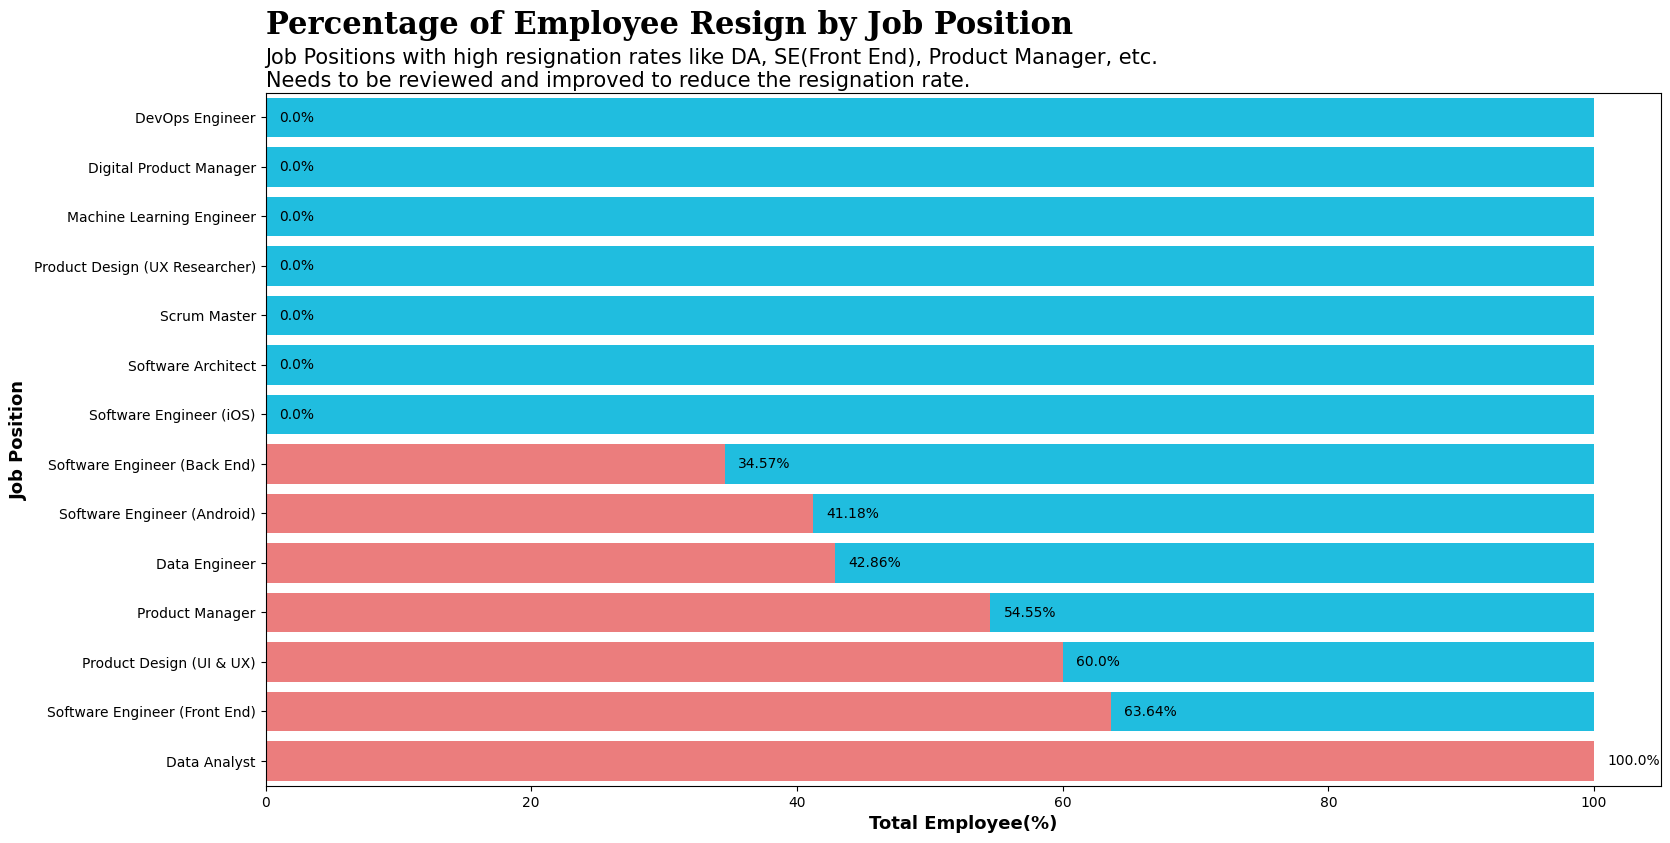

In [21]:
# Set the figure size
plt.figure(figsize=(18, 9))

# Create a barplot for the percentage of remaining employees by job position
sns.barplot(
    x='FullPct',
    y='Pekerjaan',
    data=joinedres,
    color='#00D2FF'
)

# Create a barplot for the percentage of employee resign by job position
bares = sns.barplot(
    x='PercentageResign',
    y='Pekerjaan',
    data=joinedres,
    color='#FD6B6B'
)

# add annotation for percentage resign
for i in range(len(joinedres)):
    bares.text(
        joinedres['PercentageResign'].iloc[i] + 1,
        i,
        f'{joinedres["PercentageResign"].iloc[i]}%',
        color='black',
        ha='left',
        va='center'
    )

# Update defined fondict before 
fdbold['size'] = 22

# Add title for the plot
plt.title(
    'Percentage of Employee Resign by Job Position',
    fontdict=fdbold,
    pad=42.5,
    loc='left'
)

# Add text for the plot
plt.text(
    0,
    -0.62,
    'Job Positions with high resignation rates like DA, SE(Front End), Product Manager, etc.\nNeeds to be reviewed and improved to reduce the resignation rate.', 
    fontsize=15,
    # fontweight='bold',
    color='black'
)

# Add x and y labels
plt.xlabel('Total Employee(%)', fontsize=13, fontweight='bold')
plt.ylabel('Job Position', fontsize=13, fontweight='bold')

plt.show()

**Insights**:
- Job Position with the highest percentage of resign is 'Data Analyst' with 100% resign rate.

- Job Position with resign rate *above 50%* other than DA are:
    - Software Engineer (Front End)
    - Product Design (UI & UX)
    - Product Manager

- Job Position with resign rate *below 50%* are:
    - Data Engineer
    - Software Engineer (Android)
    - Software Engineer (Back End)

In [22]:
# Create a new dataframe by grouping  'Pekerjaan' and 'AlasanResign' by 'Resign' column
jobres = data_eda1.groupby(['Pekerjaan', 'AlasanResign'])['Resign'].value_counts().reset_index(name='Total')

# filter the rows where 'Resign' is 'Yes'
jobres = jobres[jobres['Resign']=='Yes']

# Create a dictionary to map unique values to integers for source and target
unique_jobs = jobres['Pekerjaan'].unique()
unique_reasons = jobres['AlasanResign'].unique()
label_list = list(unique_jobs) + list(unique_reasons)
label_dict = {label: index for index, label in enumerate(label_list)}

# Create source, target and values lists
source = jobres['Pekerjaan'].map(label_dict).values
target = jobres['AlasanResign'].map(label_dict).values
value = jobres['Total'].values

# Create the sankey chart
fig = go.Figure(data=[go.Sankey(
    node=dict(
        pad=15,
        thickness=25,
        line=dict(color='black', width=0.5),
        label=label_list,
        ),
    link=dict(
        source=source,
        target=target,
        value=value,
        # color='blue',
        # hoverinfo='value',
        line=dict(width=0.5, color='white')
    )
)])

fig.update_layout(title_text='Reasons for Employee Resign by Job Position',
                    title_font=dict(  
                        family='serif',
                        size=22,
                        color='black'
                    ),
                    font_size=13.5,
                    width=800,
                    height=800 )

fig.show()

**Insights**:
- Data Analyst with the highest resignation rate 100% (from the previous plot), the resignation reason is mostly because of the toxic culture and internal conflict in the company. This could indicate that employees are feeling unsatisfied with the work environment and relationships with colleagues in the company, management need to consider improving the company culture and resolving internal conflicts to retain employees.

- Job Position Software Engineer (Front End & Back End) has pattern that one of the reason their resigned is because they can't work remotely, this could indicate that employees are looking for flexibility in their work arrangements. management need to consider offering remote work or hybrid work options to retain employees. 

- from 5 job positions are resigned because of the jam kerja (work hours), This could indicate that employees are feeling overworked or unsatisfied with the work-life balance offered by the company. management need to consider redistributing tasks, hiring additional support, or offering flexible work arrangements to improve work-life balance.

- reason ganti karir (switch career) or like kejelasan karir (career clarity) is also a common employee's reason for resign in the company with 5 job positions is resigned because of this, this could indicate that employees are looking for new challanges or better opportunities. management need to consider offering career development opportunities, training programs, or promotion to retain employees.
<br><br>

**Actionable Recommendations**:<br>
Based on the reasons, I suggest specific actions for management to address them.
- For toxic culture: Implement team-building activities, conduct anonymous employee surveys, and offer conflict resolution training for managers.

- For remote work: Pilot a remote work program or offer a hybrid work model.

- For work-life balance: Analyze workload distribution and consider hiring additional staff or implementing flexible scheduling options.

- For career development: Create clear career paths, offer mentorship programs, and provide opportunities for skill development through training or conferences.


In [23]:
jpa = data_eda1.groupby(['JenjangKarir', 'PerformancePegawai', 'AlasanResign'])['Resign'].value_counts().reset_index(name='Total')

jpa_res = jpa[jpa['Resign']=='Yes']

fig = px.sunburst(
    jpa_res, 
    path=['JenjangKarir', 'PerformancePegawai', 'AlasanResign'],
    values='Total'
)

fig.update_layout(
    width=800,
    height=800,
    title='Employee Resignation by Career level, Performance, and Reason',
    title_font_size=20,
    title_font_family='serif',
    title_font_color='black',
    title_x=0.5,
    title_y=1,
    title_pad_t=20,
    title_pad_b=20
)

fig.show()

**Insights**:

- Flight Risk in Early Careers:<br>There's a higher resignation rate among fresh graduates, often due to "ganti karir" (switching careers) and lack of remote work options. This suggests a mismatch between expectations and reality or a lack of early career support.

- Losing Top Performers:<br>The company is losing good talent ("Sangat Bagus", "Bagus", "Biasa") across all levels. This highlights a need to address reasons for resignation across the board.

- Work-Life Balance and Flexibility Concerns:<br>"Jam kerja" (long work hours) and lack of remote work options are common reasons for resignation across levels, indicating a work-life balance issue and a need for flexible work arrangements.

- Career Development and Leadership:<br>"Ganti karir" and "kejelasan karir" are common concerns, suggesting employees may not see clear growth paths or opportunities within the company. Additionally, "toxic culture" and "leadership" issues contribute to resignations at all levels.
<br><br>

Actionable Recommendations:

- Targeted Onboarding and Early Career Development:
    - Implement a structured onboarding program for fresh graduates, including mentorship and career exploration opportunities.
    - Offer clear career paths with defined milestones and training programs specific to each level.

- Improved Work-Life Balance and Flexibility:
    - Analyze workloads and redistribute tasks to prevent burnout.
    - Consider offering a remote work program or hybrid model to cater to employee preferences.
    - Implement flexible scheduling options, if possible.

- Retention Strategies for High-Performing Employees:
  - Conduct exit interviews with high-performing employees to understand their reasons for leaving.
  - Offer competitive compensation packages and benefits to retain top talent.
  - Provide opportunities for career growth and development, such as promotions or leadership training.

- Addressing Culture and Leadership:
  - Conduct anonymous employee surveys to identify areas for improvement in company culture and leadership effectiveness.
  - Implement team-building activities and conflict resolution training.
  - Offer leadership development programs to improve management skills and employee engagement.

<!-- **Insights**:

- Lower Career Levels & Career Switching: There's a correlation between lower career levels (especially fresh graduates) and resignation due to "ganti karir" (switching careers). This suggests a mismatch between initial expectations and actual work, or graduates using the company as a stepping stone to explore different career paths.

- Performance and Resignation: Losing good performers (rated "Sangat Bagus" to "Biasa") across all levels highlights a need to address retention factors beyond performance management.
<br><br>

**Actionable Recommendations**:

- Fresh Graduate Program:<br> Refine Recruitment Process: Clearly outline the role's responsibilities and career path during recruitment to manage expectations. Consider skills assessments to identify potential for a longer-term fit.

- Mentorship & Development:<br>Implement a strong mentorship program to guide fresh graduates and provide career development opportunities. This fosters a sense of growth and belonging.

- Work-Life Balance and Flexibility:<br>Review Work Hours: Analyze workload and consider adjusting work hours or offering flexible scheduling options (remote work, compressed workweeks) to improve work-life balance.

- Remote Work Policy:<br>Develop a well-defined remote work policy (if feasible) to cater to employee preferences and attract talent seeking remote work flexibility.

- Company Culture and Leadership: 
    - Employee Surveys: Conduct anonymous employee surveys to gauge sentiment about company culture and leadership.
    - Culture Improvement Initiatives: Based on survey results, implement initiatives to address toxic culture issues, like team-building activities, conflict resolution training for managers, or fostering open communication channels.
    - Leadership Development: Invest in leadership development programs to equip managers with better communication, feedback, and employee engagement skills.
<br><br>

Retention Strategies:

- Career Path Clarity:<br>Clearly define career paths within the company for each level. This provides employees with a roadmap for advancement and fosters a sense of long-term growth potential within the company.

- Skill Development Opportunities:<br>Offer training programs, conferences, or internal knowledge-sharing sessions to help employees develop new skills and stay relevant in their field.

- Competitive Compensation and Benefits:<br>Review compensation packages and benefits offerings to ensure they are competitive within the industry. Consider offering perks that resonate with your target demographics, like wellness programs or educational stipends.

- Recognition and Appreciation:<br>Implement programs to recognize and appreciate employee achievements. This can involve public recognition, awards, or bonus structures to create a culture that values contributions.

By implementing these recommendations, the company can address the key reasons behind employee resignations and improve retention across all career levels in your startup. Remember, a data-driven approach like this, combined with ongoing monitoring and adjustments, is key to building a strong employer brand and retaining top talent. -->

## Task 4 - Build An Automated Resignation Behavior Prediction Using Machine Learning
**Task Goals**:<br>
Building a machine learning model to predict employee resignation behavior.<br><br>
**Task Objectives**:<br>
1. Split the data into training and testing sets.
2. Preprocess the data for machine learning.
3. Train a machine learning model to predict employee resignation behavior.
4. Evaluate the model performance.
5. Interpret the model results.

### Data Preprocessing
Start over the data preprocessing for machine learning data, because the data cleaning and processing for EDA Purpose are Different

In [24]:
# Create a copy of the original data to avoid modifying the original data
data_proc = data_ori.copy()

# Apply feature engineering function to the data
data_proc = feat_eng(data_proc)

# Other feature engineering before train test split
# Define dictionary to map Pekerjaan value
map_job = {
    'Software Engineer (Back End)': 'Team Engineer',
    'Software Engineer (Front End)': 'Team Engineer',
    'Software Engineer (Android)': 'Team Engineer',
    'Software Engineer (iOS)': 'Team Engineer',
    'DevOps Engineer': 'Team Engineer',
    'Machine Learning Engineer': 'Team Engineer',
    'Software Architect': 'Team Engineer',
    'Product Design (UI & UX)': 'Team Product',
    'Product Manager': 'Team Product',
    'Digital Product Manager': 'Team Product',
    'Product Design (UX Researcher)': 'Team Product',
    'Scrum Master': 'Team Product',
    'Data Analyst' :'Team Data',
    'Data Engineer' :'Team Data',
}
# Replace 'Pekerjaan' values with the mapped values
data_proc['Pekerjaan'] = data_proc['Pekerjaan'].replace(map_job)

# Get the value counts of 'HiringPlatform' column
platform_vc = data_proc['HiringPlatform'].value_counts()

# Identify hiring platforms with less than 20 employees
to_replace = platform_vc[platform_vc < 20].index

# Replace hiring platforms with less than 10 employees with 'Others'
data_proc['HiringPlatform'] = data_proc['HiringPlatform'].replace(to_replace, 'Others')

prsnt_year = datetime.now().year
data_proc['EmploymentTenure'] = np.where(data_proc['ResignYear'].isna(),
                                         2020 - data_proc['HiringYear'],
                                         data_proc['ResignYear'] - data_proc['HiringYear'])

# Drop invalid values where the employment tenure is negative
# This means the Resign Date is before the Hiring Date
data_proc = data_proc[data_proc['EmploymentTenure'] >= 0]

# Because there's missing values on some features, 
# so I need to fill the missing values first for each train test before creating some new features
def feat_enc1(data):
    data['WorkedOnProject'] = data['JumlahKeikutsertaanProjek'].apply(lambda x: 1 if x > 0 else 0)
    data['LateLastMonth'] = data['JumlahKeterlambatanSebulanTerakhir'].apply(lambda x: 1 if x > 0 else 0)
    return data

### Train Test Split

In [25]:
# Define variables for the model
X = data_proc.drop(columns=['Resign'])

# Define target variable
y = data_proc[['Resign']]

# Split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=103)

# Display the shape of the train and test sets
print(f'Shape of X_train: {X_train.shape}')
print(f'Shape of X_test: {X_test.shape}')

# Display the shape of the train and test sets
print(f'\nShape of y_train: {y_train.shape}')
print(f'Shape of y_test: {y_test.shape}')

Shape of X_train: (213, 32)
Shape of X_test: (72, 32)

Shape of y_train: (213, 1)
Shape of y_test: (72, 1)


<!-- from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder, OrdinalEncoder
from imblearn.over_sampling import SMOTE
from imblearn.pipeline import make_pipeline
from sklearn.base import BaseEstimator, TransformerMixin

numerical_features = data_proc.select_dtypes(include=['int64', 'float64']).columns
nominal_features = ['StatusPernikahan', 'StatusKepegawaian', 'Pekerjaan',
                    'AsalDaerah', 'HiringPlatform']
ordinal_features = ['JenjangKarir', 'PerformancePegawai',
                    'TingkatPendidikan','AgeGroup', 'WorkedOnProject']
classifier = RandomForestClassifier(random_state=13)

# Custom transformer for handling outliers
class OutlierRemover(BaseEstimator, TransformerMixin):
    def fit(self, X, y=None):
        Q1 = X.quantile(0.25)
        Q3 = X.quantile(0.75)
        IQR = Q3 - Q1
        self.lower_bound = Q1 - 1.5 * IQR
        self.upper_bound = Q3 + 1.5 * IQR
        return self
    
    def transform(self, X, y=None):
        return np.where((X < self.lower_bound) | (X > self.upper_bound), np.nan, X)

# Define preprocessor
preprocessor = ColumnTransformer(
    transformers=[
        ('num', Pipeline(steps=[
            ('imputer', SimpleImputer(strategy='median')),
            ('outlier', OutlierRemover()),
            ('scaler', StandardScaler())
        ]), numerical_features),
        ('cat_nom', Pipeline(steps=[
            ('imputer', SimpleImputer(strategy='most_frequent')),
            ('onehot', OneHotEncoder(handle_unknown='ignore'))
        ]), nominal_features),
        ('cat_ord', Pipeline(steps=[
            ('imputer', SimpleImputer(strategy='most_frequent')),
            ('ordinal', OrdinalEncoder())
        ]), ordinal_features) 
    ])

# Combine preprocessor and SMOTE in a pipeline
pipeline = make_pipeline(preprocessor, SMOTE(random_state=13), classifier)

# Fit and transform the data
pipeline.fit(X_train, y_train) -->

### Further Feature Engineering
Including Feature encoding and feature selection

In [26]:
# Apply the clean_missing values function to X_Train
X_train_cl = clean_missing(X_train)

# Create new feature and encode the data
X_train_cld = feat_enc1(X_train_cl)

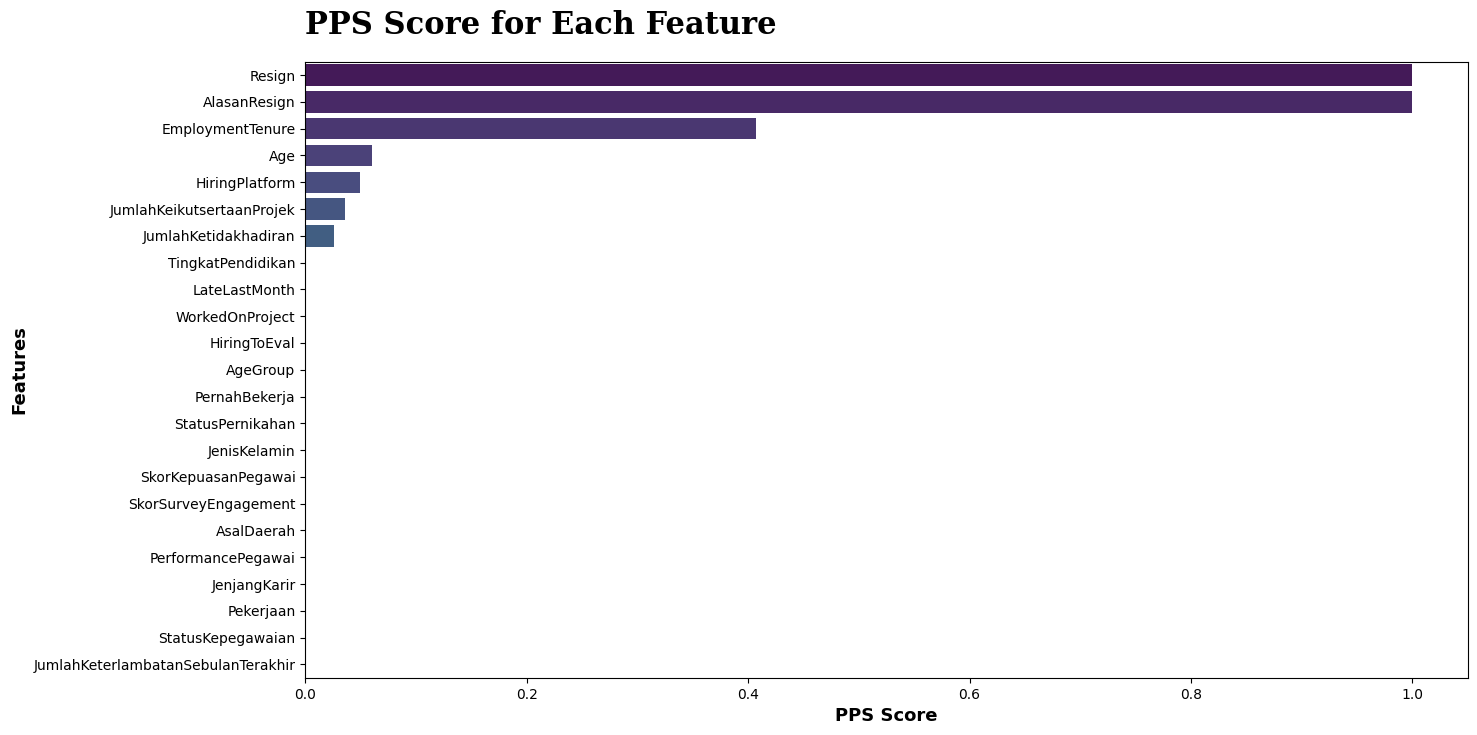

In [27]:
concat_df = pd.concat([X_train_cld, y_train], axis=1)
biascol = ['Username', 'EnterpriseID', 'TanggalHiring', 'TanggalResign', 'Email', 'HiringYear',
           'TanggalPenilaianKaryawan', 'YearEval', 'ResignYear', 'TanggalLahir', 'NomorHP']
concat_df.drop(columns=biascol, inplace=True)

pps_scores = []
for column in concat_df.columns:
    score = pps.score(concat_df, column, 'Resign')
    pps_scores.append((column, score['ppscore']))

pps_df = pd.DataFrame(pps_scores, columns=['Features', 'PPS'])

pps_df = pps_df.sort_values('PPS', ascending=False)

plt.figure(figsize=(15, 8))
sns.barplot(x='PPS', y='Features', data=pps_df, palette='viridis')

plt.title('PPS Score for Each Feature', fontdict=fdbold, pad=20, loc='left')
plt.xlabel('PPS Score', fontsize=13, fontweight='bold')
plt.ylabel('Features', fontsize=13, fontweight='bold')

plt.show()

- PPcore for Alasan Resign is very high 1, this means this feature is indicated data leakage because this feature generated after the employee resign, not before the employee resign.

- `EmploymentTenure` has a moderate PPScore indicates tjat jos feature provides a substantial amount of information about the likelihood of an employee resigning.

- `Age`, `HiringPlarform`, `JumlahKeikutsertaanProjek`, `JumlahKetidakhadiran` have low PPScore, this means that these features provide little information about the likelihood of an employee resigning.

- Other feature will be kept because based on my domain knowledge the rest of the features will be a good predictors to predict whether the employee will resign or not.

- Default feature that have been created for a new feature will be dropped to avoid feature redundancy. But for Age and AgeGroup, the AgeGroup feature that have been created from Age feature will be dropped because it has lower PPScore than Age feature.

- If the model overfit I will try to drop some of the features based the not importance feature from model's feature importances.

### Feature Encoding 

In [28]:
# Label Encoding

# Define ordinal categorical columns to be encoded
ord_data = [
    'PerformancePegawai',
    'TingkatPendidikan',
    'JenjangKarir'
]

def lencode_cat(data, ordinal_data):
    """
    Function to label encode categorical columns in the dataset.
    Args:
    data (DataFrame): dataset to be encoded.
    Returns:
    data (DataFrame): encoded dataset.
    ordinal_data (list): list of ordinal categorical columns.
    
    Example:
    >>> data = encode_cat(data, ordinal_data)
    """
    # Initialize labelEncoder
    le = LabelEncoder()

    # Encode categorical columns
    for col in ordinal_data:
        data[col] = le.fit_transform(data[col])

    return data

# Apply the encode_cat function to the X_train_cl data
X_train_lenc = lencode_cat(X_train_cld, ord_data)

# Define dictionary to map the target variable
map_target = {
    'No': 0,
    'Yes': 1
}

# Map the target variable
y_train['Resign'] = y_train['Resign'].map(map_target)


# One hot encode
# Define nominal categorical columns to be encoded
nom_data = [
    'StatusPernikahan',
    'StatusKepegawaian',
    'Pekerjaan',
    'AsalDaerah',
    'HiringPlatform'
]

# Encode nominal data with pd.get_dummies
X_train_ohe = pd.get_dummies(X_train_lenc, columns=nom_data, dtype=int)

# Define columns to drop that are not necessary (bias) for ml modelling
col2drop = biascol + ['PernahBekerja', 'AlasanResign', 'JumlahKeikutsertaanProjek', 
                      'JumlahKeterlambatanSebulanTerakhir', 'JenisKelamin', 'AgeGroup']

X_train_ohe = X_train_ohe.drop(columns=col2drop)

# Display the shape of the encoded data
print(f'Shape of X_train_enc_ohe: {X_train_ohe.shape}')

Shape of X_train_enc_ohe: (213, 33)


### Handling Outliers

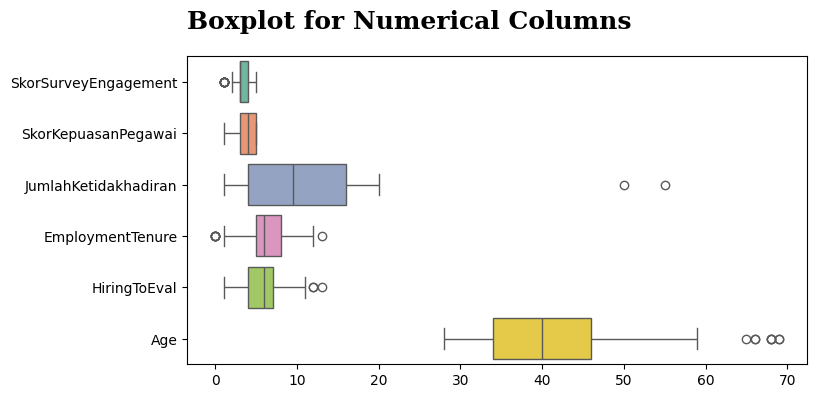

In [29]:
# Define columns to plot boxplot
colsout = [
    'SkorSurveyEngagement', 
    'SkorKepuasanPegawai', 
    'JumlahKetidakhadiran', 
    'EmploymentTenure',
    'HiringToEval',
    'Age'
]

# Set the figure size
plt.figure(figsize=(8, 4))

# Create a boxplot for the columns in colsout
sns.boxplot(data=X_train_ohe[colsout], orient='h', palette='Set2')

# Update the fontdict
fdbold['size'] = 18

# Add title for the plot
plt.title('Boxplot for Numerical Columns', fontdict=fdbold, pad=20, loc='left')

plt.show()

<Axes: >

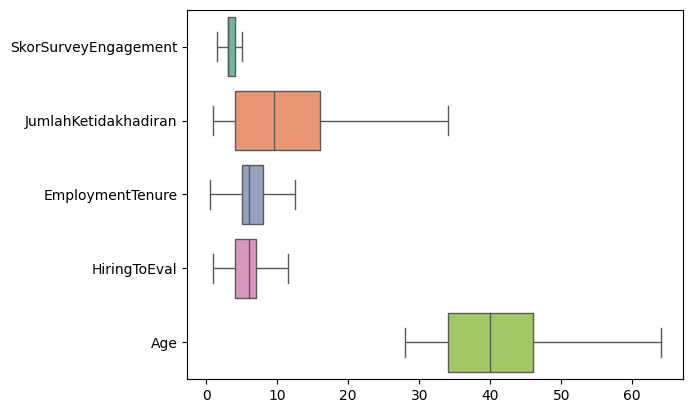

In [30]:
# Define columns with outliers
outlier_cols = [
    'SkorSurveyEngagement',
    'JumlahKetidakhadiran',
    'EmploymentTenure',
    'HiringToEval',
    'Age',
]

# Define function to cap outliers
def cap_outliers(data, cols):
    """
    Function to cap outliers in the dataset.
    
    Args:
    data (DataFrame): dataset to be capped outlier.
    cols (list): list of columns to be capped.

    Returns:
    data (DataFrame): capped dataset.
    
    Example:
    >>> data = cap_outliers(data, outlier_cols)
    """
    # Cap outliers with IQR method
    for col in cols:
        Q1 = data[col].quantile(0.25)
        Q3 = data[col].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        data[col] = np.where(data[col] < lower_bound, lower_bound, data[col])
        data[col] = np.where(data[col] > upper_bound, upper_bound, data[col])

    return data

# Apply the cap_outliers function to the X_train_enc_ohe data
X_train_noutliers = cap_outliers(X_train_ohe, outlier_cols)
# X_train_noutliers[outlier_cols] = X_train_noutliers[outlier_cols].astype(int) 

# Create boxplot one more time to make sure
sns.boxplot(data=X_train_noutliers[outlier_cols], orient='h', palette='Set2')

### Feature Scaling
Don't needed because it lower the model performance

In [31]:
# # Initialize StandardScaler
# scaler_hr = StandardScaler()

# # Scale the data
# X_train_scaled = pd.DataFrame(scaler_hr.fit_transform(X_train_noutliers),
#                               columns=X_train_noutliers.columns,
#                               index=X_train_noutliers.index)

# # Display the scaled data 
# display(X_train_scaled.head(3))

### Imbalanced Data Handling

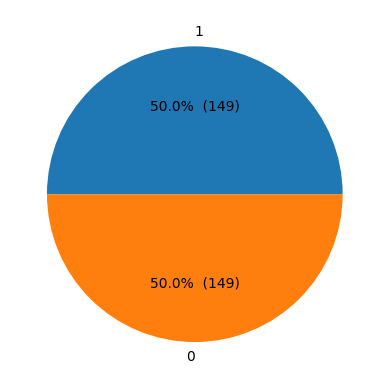

In [32]:
# Initialize SMOTETomek
stmk_hr = SMOTETomek(random_state=103)

# resample the train data
X_train_over, y_train_over = stmk_hr.fit_resample(X_train_noutliers, y_train)

# Show the target after imbalanced handling
count_target = y_train_over.Resign.value_counts()
def custom_autopct(pct):
    total = sum(count_target)
    val = int(round(pct*total/100.0))
    return '{p:.1f}%  ({v:d})'.format(p=pct,v=val)

plt.pie(
    count_target,
    labels=count_target.index,
    autopct=custom_autopct
)
plt.show()

### Update The Necessary Preprocessing Step to data test

In [33]:
X_test_cl = clean_missing(X_test)

X_test_cld = feat_enc1(X_test_cl)

X_test_lenc = lencode_cat(X_test_cld, ord_data)

y_test['Resign'] = y_test['Resign'].map(map_target)

X_test_ohe = pd.get_dummies(X_test_lenc, columns=nom_data, dtype=int)

X_test_ohe = X_test_ohe.drop(columns=col2drop)

### Machine Learning Modelling
The Machine Learning Classification will be trained for this project are:
1. Logistic Regression
2. Decision Tree
3. Random Forest
4. AdaBoost
5. XGBoost
6. GradientBoosting
<br><br>

Key evaluation metrics for the model are ROC AUC, Recall, and Precision due to data imbalance and business priorities. The company aims to minimize False Negatives (predicting an employee will stay when they will resign) because hiring and training new employees is costlier than retaining existing ones. While focusing on Recall, maintaining good Precision is also important to balance training and retaining costs.
<br><br>

But before I train and evaluate the model, I define function for train and evaluate model, and plot the roc curve so it will be more efficient to evaluate all the model at a time, if I found issue with the data that causing the machine learning model perfomance overfit or underfit (bad fit) it will be more easier to back to data preprocessing and train and evaluate all the models again. 

In [34]:
# Define function to train and evaluate the model
def train_eval_model(model, X_train, y_train, X_test, y_test, threshold):
    """
    This function evaluates the performance of given model using various metrics.

    Parameters:
    model (object): the model to be trained and evaluated
    X_train (DataFrame): the train data
    y_train (DataFrame): the target data
    X_test (DataFrame): the test data
    y_test (DataFrame): the target test data
    threshold (float): the threshold for the model prediction

    Returns:
    DataFrame: the evaluation metrics of the model

    Example:
    >>> eval_metrics = train_eval_model(LogisticRegression(), X_train, y_train, X_test, y_test, 0.5)
    """

    # Fit the model to the training data
    model.fit(X_train, y_train)

    # Predict the target variable on the test data
    y_pred_train = model.predict(X_train)
    y_pred = model.predict(X_test)

    # Predict the probability of the target variable on the test data
    y_pred_proba_train = model.predict_proba(X_train)[:, 1]
    y_pred_proba = model.predict_proba(X_test)[:, 1]

    # Compute the ROC AUC Scores for the training and testing data
    train_auc = roc_auc_score(y_train, y_pred_proba_train)
    test_auc = roc_auc_score(y_test, y_pred_proba)

    # Compute the recall scores for the training and testing data
    train_recall = recall_score(y_train, y_pred_proba_train > threshold)
    test_recall = recall_score(y_test, y_pred_proba > threshold)

    train_precision = precision_score(y_train, y_pred_proba_train > threshold)
    test_precision = precision_score(y_test, y_pred_proba > threshold)

    train_f1 = f1_score(y_train, y_pred_proba_train > threshold)
    test_f1 = f1_score(y_test, y_pred_proba > threshold)

    # Perform Stratified K-Fold Cross Validation
    kfold = StratifiedKFold(n_splits=10, shuffle=True, random_state=103)
    cv_score_auc = cross_val_score(model, X_train, y_train, cv=kfold, scoring='roc_auc')

    # Create a dictionary with the evaluation metrics
    score_dict = {
        'Model': model.__class__.__name__, 
        'AUC_train': [train_auc], 
        'AUC_test': [test_auc],
        'CrossVal_AUC': [cv_score_auc.mean()],
        'Recall_train': [train_recall],
        'Recall_test': [test_recall],
        'Precision_train': [train_precision],
        'Precision_test': [test_precision],
        'F1_train': [train_f1],
        'F1_test': [test_f1]
        # 'CrossVal_Recall': [cv_score_recall.mean()]
    }

    # Create a DataFrame from the dictionary
    score_df = pd.DataFrame(score_dict)

    return score_df

In [35]:
def plot_roc_curve(model, X_train, y_train, X_test, y_test, ax):
    """
    This function plots the Receriver Operating Characteristic (ROC) curve for a given model.

    Parameters:
    model: The machine learning model to be evaluated.
    X_train: The training data.
    y_train: The labels for the training data.
    X_test: The testing data.
    y_test: The labels for the testing data.
    ax: The axes object to plot on.

    Returns:
    A plot of the ROC curve, with the area under the curve (AUC) displayed in the legend.

    Examples:
    >>> plot_orc_curve(LogisticRegression(), X_train, y_train, X_test, y_test, ax)

    """

    # Fit the model to the training data
    model.fit(X_train, y_train)

    # Predict the probabilities of the positive calss for the testing data
    y_pred_proba = model.predict_proba(X_test)[:, 1]

    # Compute the false positive rate,  true positive rate, and thresholds for the ROC Curve
    fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)

    # Compute the area under the ROC curve
    auc = roc_auc_score(y_test, y_pred_proba)

    # Plot the ROC curve
    ax.plot(fpr, tpr, label=f'{model.__class__.__name__} AUC = {auc:.2f}')

    # Plot the line of no discrimination
    ax.plot([0, 1], [0, 1], 'r--')

    # Label the x-axis as 'False Positive Rate'
    ax.set_xlabel('False Positive Rate')

    # Label the y-axis as 'True Positive Rate'
    ax.set_ylabel('True Positive Rate')

    # Title the plot as 'ROC Curve'
    ax.set_title('ROC Curve')

In [36]:
def plot_confusion_matrix(model, X_test, y_test, threshold):
    """
    This function plots the confusion matrix for a given model.
    
    Parameters:
    model: The machine learning model to be evaluated.
    X_test: The testing data.
    y_test: The labels for the testing data.
    threshold: The threshold for classifying the output into different classes.
    
    Returns:
    A plot of the confusion matrix, with the number and percentage of each type of prediction displayed.
    """
    # Fit the model to the training data
    model.fit(X_train_over, y_train_over)

    # Get the predicted probabilities on the test data
    y_pred_proba = model.predict_proba(X_test)[:, 1]

    # Calculate the predicted values based on the threshold
    y_pred = (y_pred_proba > threshold).astype(int)

    # Calculate the confusion matrix
    cm = confusion_matrix(y_test, y_pred)

    # Calculate the percentage of each value in the confusion matrix
    cm_perc = cm / cm.sum()

    # Define the labels
    labels = np.array([['TN', 'FP'],
                       ['FN', 'TP']])
    
    # Create labels with the percentage values
    labels = (np.asarray(["{0}\n{1} ({2:.2%})".format(label, value, percentage)
                              for label, value, percentage in zip(labels.flatten(), cm.flatten(), cm_perc.flatten())])
                 ).reshape(2,2)

    # Create a heatmap of the confusion matrix
    plt.figure(figsize=(9, 7))
    sns.heatmap(
        cm, 
        annot=labels, 
        fmt='', 
        cmap='nipy_spectral', 
        cbar=False, 
        annot_kws={'size': 15, 'weight': 'bold'}, 
        # linewidths=0.5, 
        linecolor='black', 
        xticklabels=['Not Resign', 'Resign'], 
        yticklabels=['Not Resign', 'Resign']
    
    )
    plt.xticks(fontsize=14)
    plt.yticks(fontsize=14)
    plt.xlabel('Predicted', fontsize=16)
    plt.ylabel('Actual', fontsize=16)
    plt.title('Confusion Matrix')
    plt.show()

,Model,AUC_train,AUC_test,CrossVal_AUC,Recall_train,Recall_test,Precision_train,Precision_test,F1_train,F1_test
0,LogisticRegression,0.962659,0.922743,0.922286,0.892617,0.625000,0.910959,0.833333,0.901695,0.714286
0,DecisionTreeClassifier,1.000000,0.875000,0.857619,1.000000,0.833333,1.000000,0.833333,1.000000,0.833333
0,RandomForestClassifier,1.000000,0.907118,0.950190,1.000000,0.541667,1.000000,0.866667,1.000000,0.666667
0,AdaBoostClassifier,0.984775,0.827257,0.900476,0.919463,0.416667,0.925676,0.714286,0.922559,0.526316
0,XGBClassifier,1.000000,0.917535,0.965587,1.000000,0.708333,1.000000,0.850000,1.000000,0.772727
0,GradientBoostingClassifier,1.000000,0.920139,0.963746,1.000000,0.666667,1.000000,0.888889,1.000000,0.761905


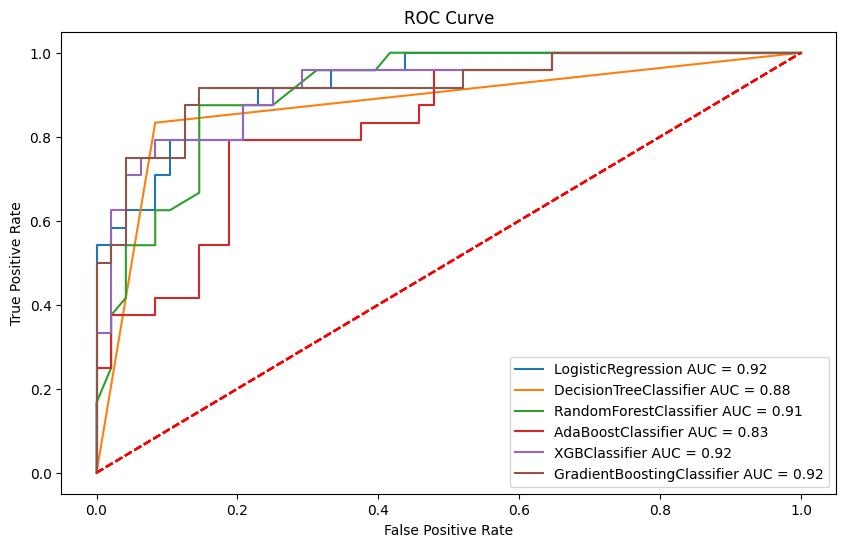

In [37]:
# Instatiate the models with the same random state for reproducibility
lr_hr = LogisticRegression(random_state=103)
dt_hr = DecisionTreeClassifier(random_state=103)
rf_hr = RandomForestClassifier(random_state=103)
adb_hr = AdaBoostClassifier(random_state=103)
xgb_hr = XGBClassifier(random_state=103)
gb_hr = GradientBoostingClassifier(random_state=103)

# List of models
models = [lr_hr, dt_hr, rf_hr, adb_hr, xgb_hr, gb_hr]

# List to store the scores
scores = []

# Train and evaluate the models
for model in models:
    score = train_eval_model(model, X_train_over, y_train_over, X_test_ohe, y_test, 0.5)
    scores.append(score)

# Concatenate the evaluation metrics of the models
eval_metrics = pd.concat(scores)

# Display the evaluation metrics
display(eval_metrics)


# Iterate plot roc ucurve for the model
fig, ax = plt.subplots(figsize=(10, 6))

for model in models:
    plot_roc_curve(model, X_train_over, y_train_over, X_test_ohe, y_test, ax)

# Display the legend
ax.legend()

# Display the plot
plt.show()

From the result of model metrics evaluation performance, **the best model with highest AUC** score is Logistic Regression, but even though **XGBoost** AUC score on test slightly lower than Logistic Regression **on validation data XGBoost got higher score** indicates that the **model is able to generalize well on unseen data**. This model also have the highest Recall score on test data, which means the model is able to predict the employee who will resign correctly. Because of that XGBoost is selected as the best model and will be hyperparameter tuned to get the best model.

### Hyperparameter and Threshold tuning XGBoost
Even though the model has a good performance, this hyperparameter tuning just for experiment

In [107]:
# Define XGBoost Parameter
xgb_param_tune = {
    'n_estimators': [50, 100, 150, 200],
    'max_depth': [3, 4, 5, 6],
    'learning_rate': [0.01, 0.05, 0.1, 0.2],
    'min_child_weight': [1, 3, 5, 7],
    'gamma': [0, 0.1, 0.2, 0.3],
    'subsample': [0.6, 0.7, 0.8, 0.9],
    'colsample_bytree': [0.6, 0.7, 0.8, 0.9],
    'reg_alpha': [0.01, 0.1, 1, 10],
}

# Initialize XGBClassifier
xgb_ht = XGBClassifier(random_state=103)

# Initialize GridSearchCV
xgb_grid = GridSearchCV(
    xgb_ht,
    xgb_param_tune,
    cv=5,
    scoring='roc_auc',
    n_jobs=-1
)

# Fit the model
xgb_grid.fit(X_train_over, y_train_over)

# Get the best params
xgbest_params = xgb_grid.best_params_

# Get the best score
xgb_grid.best_score_

# Print best params and score
print(f'Best Parameters: {xgb_grid.best_params_}')
print(f'Best Score: {xgb_grid.best_score_}')

Best Parameters: {'colsample_bytree': 0.9, 'gamma': 0, 'learning_rate': 0.1, 'max_depth': 4, 'min_child_weight': 1, 'n_estimators': 100, 'reg_alpha': 0.01, 'subsample': 0.9}
Best Score: 0.9752413793103448


In [108]:
# Tune the model with the best parameter and default threshold
xgb_tuned = XGBClassifier(**xgbest_params, random_state=103)

xgb_tuned_score = train_eval_model(xgb_tuned, X_train_over, y_train_over, X_test_ohe, y_test, 0.5)

display(xgb_tuned_score)

,Model,AUC_train,AUC_test,CrossVal_AUC,Recall_train,Recall_test,Precision_train,Precision_test,F1_train,F1_test
0,XGBClassifier,1.0,0.932292,0.969238,1.0,0.708333,1.0,0.894737,1.0,0.790698


After hyperparameter tuning AUC on test and validation set increased, but the recall precision are the same as before, Let's try to tune up the max_depth parameter and see if the model performance increase, and try to tune the threshold lower to get the higher recall score.

XGBoost Before Hyperparameter Tuning at the same threshold of 0.22


,Model,AUC_train,AUC_test,CrossVal_AUC,Recall_train,Recall_test,Precision_train,Precision_test,F1_train,F1_test
0,XGBClassifier,1.0,0.917535,0.965587,1.0,0.791667,0.993333,0.826087,0.996656,0.808511


XGBoost After Hyperparameter Tuning at the same threshold of 0.22


,Model,AUC_train,AUC_test,CrossVal_AUC,Recall_train,Recall_test,Precision_train,Precision_test,F1_train,F1_test
0,XGBClassifier,1.0,0.938368,0.970127,1.0,0.875,0.986755,0.84,0.993333,0.857143


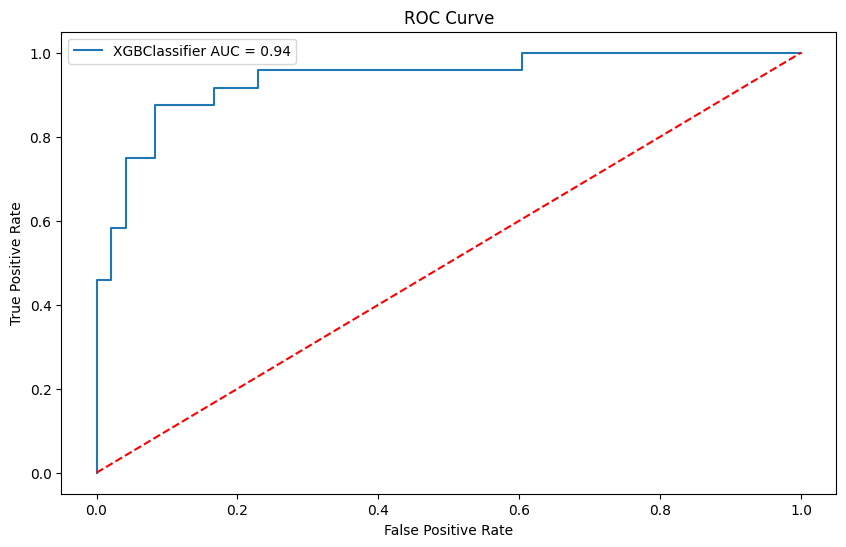

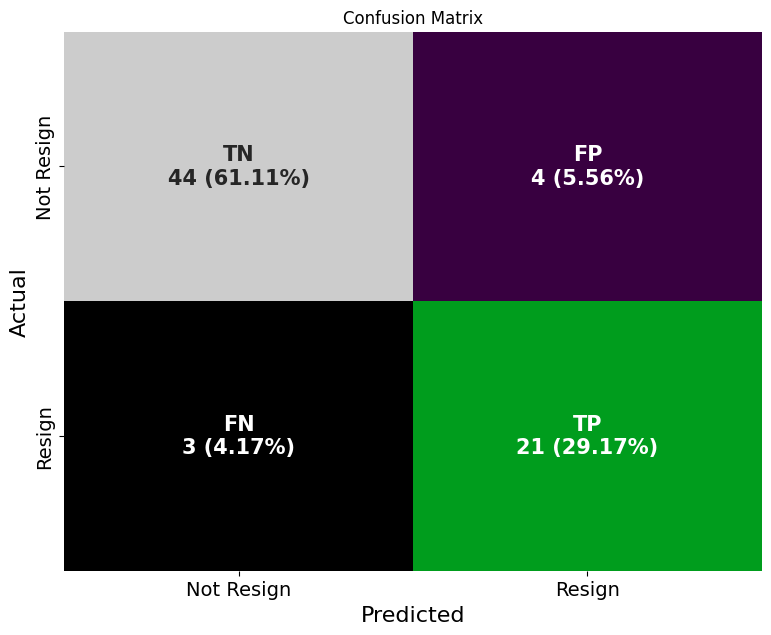

In [38]:
new_params = {
    'colsample_bytree': 0.9,
    'gamma': 0,
    'learning_rate': 0.05,
    'max_depth': 6, # Set the max_depth from 4 to 6
    'min_child_weight': 1,
    'n_estimators': 150,
    'reg_alpha': 0.01,
    'subsample': 0.9
}

# Tune the model with the best parameter and get the best threshold probability
xgb_new = XGBClassifier(**new_params, random_state=103)

# Train and evaluate the model with the same threshold of 0.22 (lower the threshold to find best recall score)
score_before_tuning = train_eval_model(xgb_hr, X_train_over, y_train_over, X_test_ohe, y_test, 0.22)
score_after_tuning = train_eval_model(xgb_new, X_train_over, y_train_over, X_test_ohe, y_test, 0.22)

print('XGBoost Before Hyperparameter Tuning at the same threshold of 0.22')
display(score_before_tuning)

print('XGBoost After Hyperparameter Tuning at the same threshold of 0.22')
display(score_after_tuning)

fig, ax = plt.subplots(figsize=(10, 6))
plot_roc_curve(xgb_new, X_train_over, y_train_over, X_test_ohe, y_test, ax)
ax.legend()
plot_confusion_matrix(xgb_new, X_test_ohe, y_test, 0.22)
plt.show()

Even though the AUC on test set is slightly lower but on the validation set the AUC is higher, the recall score is also higher than the previous model, this means the model is able to minimize the false predicted the employee will not resign but the actual is resign. And because of that this model is selected as the best model with the threshold of 0.22

#### Business Impact Simulation

##### Cost Saving Analysis on Different Threshold

In [39]:
def cost_saving_analysis(model, X_test, y_test, threshold, recruitment_cost, training_cost, retain_cost):
    """
    This function calculates the cost savings of a model based on the confusion matrix.
    
    Parameters:
    model: The machine learning model to be evaluated.
    X_test: The testing data.
    y_test: The labels for the testing data.
    threshold: The threshold for classifying the output into different classes.
    recruitment_cost: The cost of recruitment for each employee.
    training_cost: The cost of training for each employee.
    retain_cost: The cost of retaining each employee.
    
    Returns:
    The total cost savings of the model.
    """
    
    # Get the predicted probabilities on the test data
    y_pred_proba = model.predict_proba(X_test)[:, 1]

    # Calculate the predicted values based on the threshold
    y_pred = (y_pred_proba > threshold).astype(int)

    # Calculate the confusion matrix
    cm = confusion_matrix(y_test, y_pred)

    # Calculate the cost of false negatives
    fncost = cm[1, 0] * (recruitment_cost + training_cost + retain_cost) 

    # Calculate the cost of false positives
    fpcost = (cm[0, 1] * (retain_cost)) + (cm[1, 1] * retain_cost)

    return fncost, fpcost

Optimal Cost Threshold: 0.25


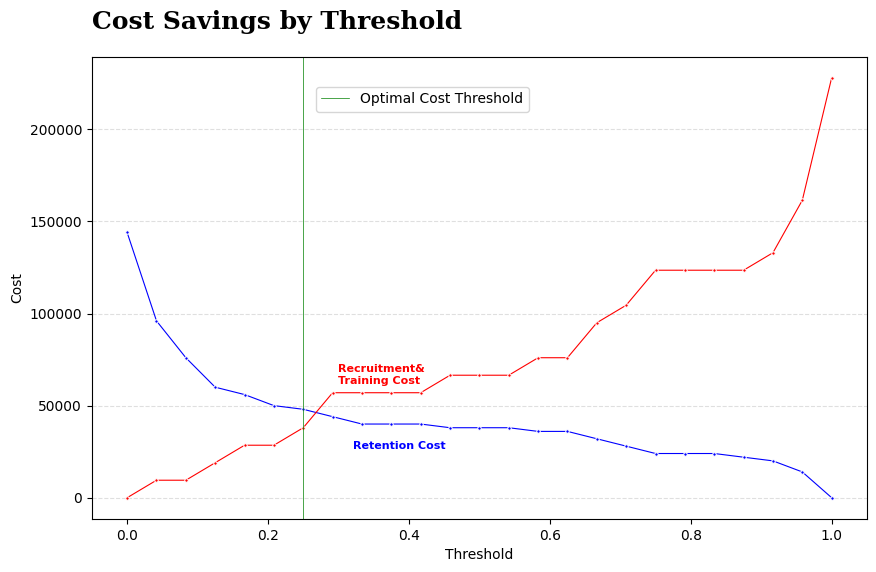

In [40]:
# Assumption for the cost saving analysis 
recruitment_cost = 5000
training_cost = 2500
retain_cost = 2000

# Define the threshold values
thresholds = np.linspace(0, 1, 25)

# Initialize the cost savings list
fn_cost_list = []
fp_cost_list = []

# Calculate the cost savings for each threshold
for threshold in thresholds:
    fncost, fpcost = cost_saving_analysis(xgb_new, X_test_ohe, y_test, threshold, recruitment_cost, training_cost, retain_cost)
    fn_cost_list.append(fncost)
    fp_cost_list.append(fpcost)


threscost = pd.DataFrame({
    'Threshold': thresholds,
    'Retain Cost': fp_cost_list,
    'Recruit Train Cost': fn_cost_list,
})

threscost['Cost Diff'] = abs(threscost['Retain Cost'] - threscost['Recruit Train Cost'])
threscost['Total Cost'] = threscost['Retain Cost'] + threscost['Recruit Train Cost']
min_cost_diff = threscost['Cost Diff'].min()
opt_cost_diff = threscost[threscost['Cost Diff'] == min_cost_diff]
opt_cost = opt_cost_diff["Threshold"].values[0]
print(f'Optimal Cost Threshold: {opt_cost:.2f}')

# Plot the cost savings against the threshold
plt.figure(figsize=(10, 6))

sns.lineplot(
    x='Threshold',
    y='Retain Cost',
    data=threscost,
    # label='Retain Cost',
    color='b',
    marker='o',
    markersize=2.5,
    linewidth=0.8
)

sns.lineplot(
    x='Threshold',
    y='Recruit Train Cost',
    data=threscost,
    # label='Recruit Train Cost',
    color='r',
    marker='o',
    markersize=2.5,
    linewidth=0.8
)

plt.axvline(opt_cost, color='g', linestyle='-', linewidth=0.5, alpha=1, label='Optimal Cost Threshold')
plt.legend(loc='upper left', bbox_to_anchor=(0.28, 0.95))
# plt.axvline(0.5, color='y', linestyle='--', linewidth=1.5, alpha=0.3)

plt.text(
    0.3, 62000,
    'Recruitment&\nTraining Cost',
    fontsize=8,
    color='red',
    fontweight='bold'
)

plt.text(
    0.32, 26700,
    'Retention Cost',
    fontsize=8,
    color='blue',
    fontweight='bold'
)

plt.xlabel('Threshold')
plt.ylabel('Cost')

plt.title('Cost Savings by Threshold', fontdict=fdbold, pad=20, loc='left')
plt.grid(axis='y', linestyle='--', alpha=0.4)
plt.show()

In [41]:
def_threshold = threscost[threscost['Threshold'] == 0.5]['Total Cost'].values[0]
opt_threshold = threscost[threscost['Threshold'] == opt_cost]['Total Cost'].values[0]

cost_thres_diff = def_threshold - opt_threshold
print(f'Cost on Default Threshold: ${def_threshold:,}')
print(f'Cost on Optimal Threshold: ${opt_threshold:,}\n')
print(f'Cost Difference/Saved between Normal and Optimal Threshold: ${cost_thres_diff:,}')

Cost on Default Threshold: $104,500
Cost on Optimal Threshold: $86,000

Cost Difference/Saved between Normal and Optimal Threshold: $18,500


##### Cost Difference Without or With Model Implementation

In [44]:
# Fit the model (Because on the previous one I use Function to train and evaluate the model)
xgb_new.fit(X_train_over, y_train_over)

# Get the predicted probabilities on the test data
y_pred_proba = xgb_new.predict_proba(X_test_ohe)[:, 1]

# Calculate the predicted values based on the threshold
y_pred = (y_pred_proba > opt_cost).astype(int)

# Calculate the confusion matrix
cm = confusion_matrix(y_test, y_pred)

TN = cm[0, 0]
FP = cm[0, 1]
FN = cm[1, 0]
TP = cm[1, 1]

# Assumption 50% of the employee on the test data resign
total_employee = y_test.shape[0] 
res_employee = total_employee * 0.5
tc_b4_model = res_employee * (recruitment_cost + training_cost + retain_cost)

# Cost after model
fncost = FN * (recruitment_cost + training_cost + retain_cost)
fpcost = (FP * retain_cost) + (TP * retain_cost)
tc_after_model = fncost + fpcost

# Cost savings
cost_savings = tc_b4_model - tc_after_model

# Print the results
print(f'Total Cost Before Model: ${tc_b4_model:,}')
print(f'Total Cost After Model: ${tc_after_model:,}')
print(f'Total Cost Saved: ${cost_savings:,}')

Total Cost Before Model: $342,000.0
Total Cost After Model: $86,000
Total Cost Saved: $256,000.0


With XGBoost model implementation, the company can save up to 250,000 USD per year by reducing the number of employees who resign. This cost-saving analysis demonstrates the potential financial benefits of using machine learning to predict employee resignations and implement targeted retention strategies.

<!-- In this case we don't prioritize employee that wanted to resign (predicted resign and actual resign), but we prioritize the employee that don't want to resign (predicted resign but actual not resign). So, we will focus on the False Negative (FN) value to calculate the cost of the model. -->

#### XGBoost Feature Importance & SHAP Values

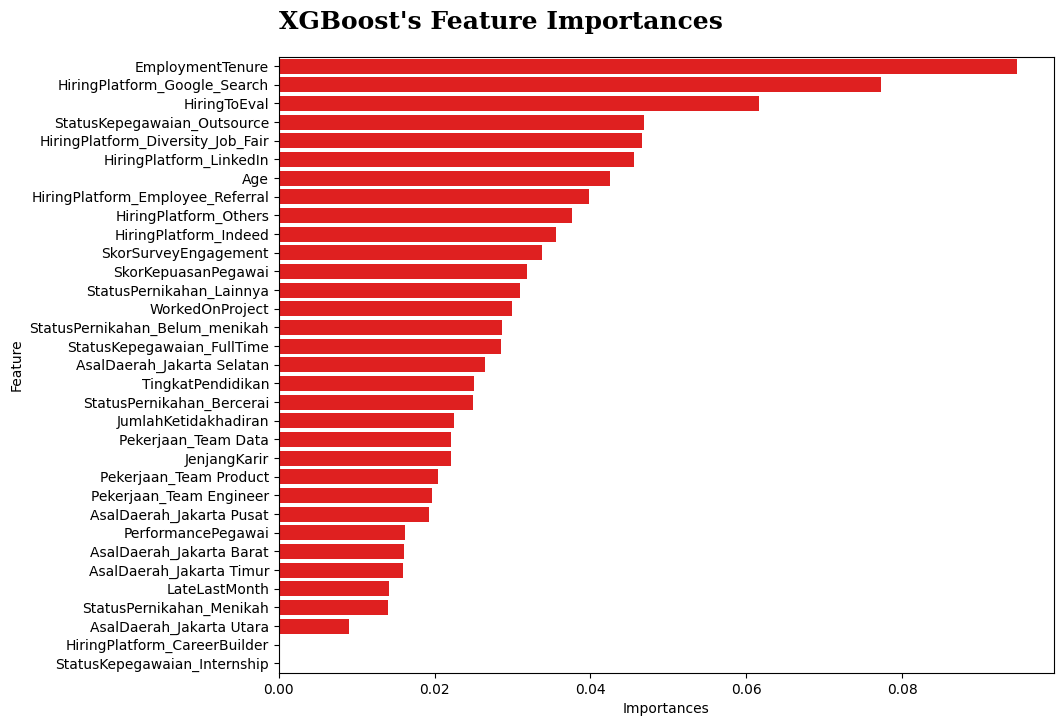

In [133]:
# Get the XGBoost Feature importances
xgb_importance = xgb_new.feature_importances_

# Create Dataframe of the Feature importances
imp_df = pd.DataFrame({
    'Feature': X_train_over.columns,
    'Importances': xgb_importance
})

# SOrt the DataFrame by the importances
imp_df = imp_df.sort_values('Importances', ascending=False)


plt.figure(figsize=(10, 8))

sns.barplot(x='Importances', y='Feature', data=imp_df, color='r')
plt.title("XGBoost's Feature Importances", fontdict=fdbold, pad=20, loc='left')

plt.show()

From the XGBoost's feature importance plot, we can see that the top 5 most important features for predicting employee resignation are:
1. `EmploymentTenure`
2. `HiringPlatform_Google_Search`
3. `HiringToEval`
4. `StatusKepegawaian_Outsource`
5. `HiringPlatform_Diversity_Job_Fair / LinkedIn`
<br><br>
To see the impact of each feature on the model's predictions, we can use SHAP (SHapley Additive exPlanations) values. SHAP values provide a unified measure of feature importance and directionality, showing how each feature contributes to the model's output for each prediction.


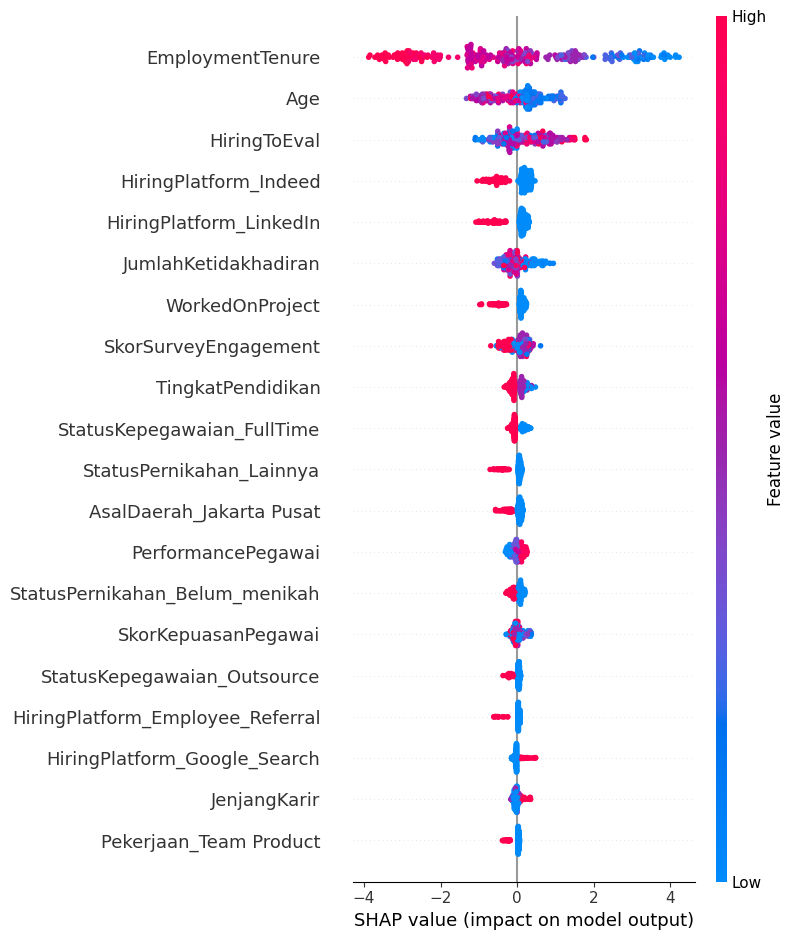

In [116]:
# Create a Tree Explainer
t_explainer = shap.TreeExplainer(xgb_new)

# Get the SHAP Values
shap_values = t_explainer.shap_values(X_train_over)

# Create a summary plot
shap.summary_plot(shap_values, X_train_over)

Here's what the SHAP values tell us about each factor's influence the XGBoost model prediction:

- Tenure: Employees with shorter tenures are more likely to resign, according to the model. This suggests that building tenure might increase employee retention.

- Age: The model predicts a higher chance of resignation for younger employees. This could be due to various factors like career exploration or lack of attachment to the company.

- Time to Evaluation: A longer period between hiring and evaluation increases the predicted chance of resignation. This might indicate a need to streamline the evaluation process and provide earlier feedback.

- Hiring Platform: Employees hired through Indeed and LinkedIn are predicted to have a lower chance of resigning. This suggests these platforms might attract candidates with a stronger fit for the company.

- Absenteeism: Interestingly, the model predicts a higher chance of resignation for employees with less absenteeism. This could be because highly engaged employees who rarely miss work might be more likely to seek new opportunities if they feel unfulfilled.

- Project Involvement: Employees who have worked on projects are predicted to have a lower chance of resigning. This suggests that project involvement might increase employee engagement and satisfaction.

- Engagement Scores: A lower employee engagement score predicts a higher chance of resignation. This highlights the importance of fostering a positive work environment and addressing employee concerns.

- Performance: This one seems counterintuitive. The model predicts a higher chance of resignation for high performers. There could be a few explanations: high performers might get better job offers elsewhere, feel under-challenged, or have unmet expectations for advancement.